# Importing Dependencies

In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score , classification_report,ConfusionMatrixDisplay,precision_score,recall_score, f1_score,roc_auc_score,roc_curve, balanced_accuracy_score
from sklearn.model_selection import GridSearchCV

# Data Collection  

In [7]:
#Loading the breast cancer dataset from csv file to pandas dataframe
breast_cancer_data= pd.read_csv("Breast_cancer_data.csv")

# Data pre-processing

In [8]:
breast_cancer_data.keys()

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [9]:
#printing the first five rows of the dataframe
breast_cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
breast_cancer_data.shape

(1138, 32)

In [11]:
#CHecking the data types
breast_cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1138 entries, 0 to 1137
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       1138 non-null   int64  
 1   diagnosis                1138 non-null   object 
 2   radius_mean              1138 non-null   float64
 3   texture_mean             1138 non-null   float64
 4   perimeter_mean           1138 non-null   float64
 5   area_mean                1138 non-null   float64
 6   smoothness_mean          1138 non-null   float64
 7   compactness_mean         1138 non-null   float64
 8   concavity_mean           1138 non-null   float64
 9   concave points_mean      1138 non-null   float64
 10  symmetry_mean            1138 non-null   float64
 11  fractal_dimension_mean   1138 non-null   float64
 12  radius_se                1138 non-null   float64
 13  texture_se               1138 non-null   float64
 14  perimeter_se            

In [12]:
#Removing the id column 
breast_cancer_data.drop(columns='id',axis=1, inplace=True)

In [13]:
# Checking for null values
breast_cancer_data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [14]:
# Checking for missing values
breast_cancer_data.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [15]:
# Statistical summary of the data- Descriptive Statistics
breast_cancer_data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,...,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.522499,4.299144,24.288293,351.759340,0.014058,0.052790,0.079685,0.038786,0.027402,0.007057,...,4.831116,6.143554,33.587762,569.106561,0.022822,0.157267,0.208533,0.065703,0.061840,0.018053
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [16]:
breast_cancer_data['diagnosis'].value_counts()

B    714
M    424
Name: diagnosis, dtype: int64

# Exploratory Data Analysis

In [17]:
#Encoding the targeted column
label_encode= LabelEncoder()

In [18]:
labels= label_encode.fit_transform(breast_cancer_data['diagnosis'])

In [19]:
breast_cancer_data['target']=labels

In [20]:
breast_cancer_data.drop(columns='diagnosis', axis=1, inplace= True)

In [21]:
#Diagnosis column removed
breast_cancer_data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [22]:
breast_cancer_data['target'].value_counts()

0    714
1    424
Name: target, dtype: int64

In [23]:
values={}
for column in breast_cancer_data.columns:
    values[column]= breast_cancer_data[column].value_counts().shape[0]
pd.DataFrame(values, index=['Unique values in the dataset']).transpose()

,Unique values in the dataset
radius_mean,456
texture_mean,479
perimeter_mean,522
area_mean,539
smoothness_mean,474
compactness_mean,537
concavity_mean,537
concave points_mean,542
symmetry_mean,432
fractal_dimension_mean,499


# Data visualisation

<AxesSubplot:xlabel='target', ylabel='count'>

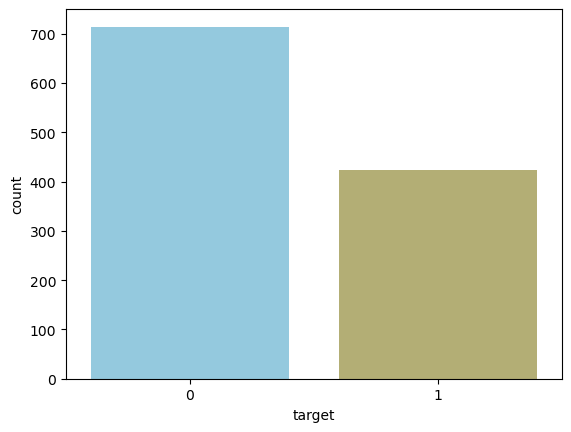

In [24]:
#Countplot for the target column for checking the distribution of target
colors = ['skyblue', 'darkkhaki']
sns.countplot(x='target',data=breast_cancer_data, palette=colors)
#Benign=0
#Malignant=1

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


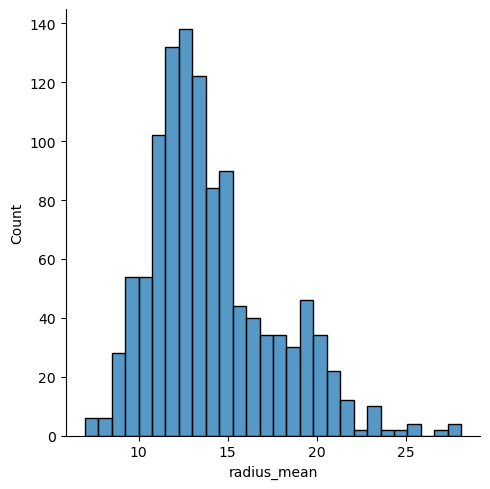

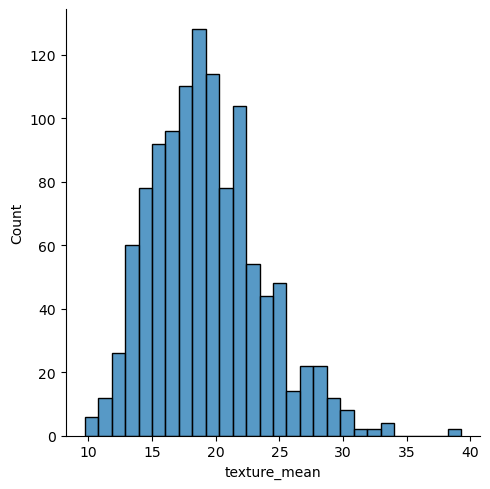

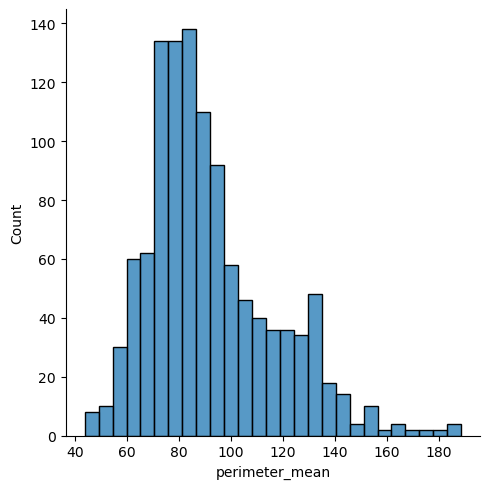

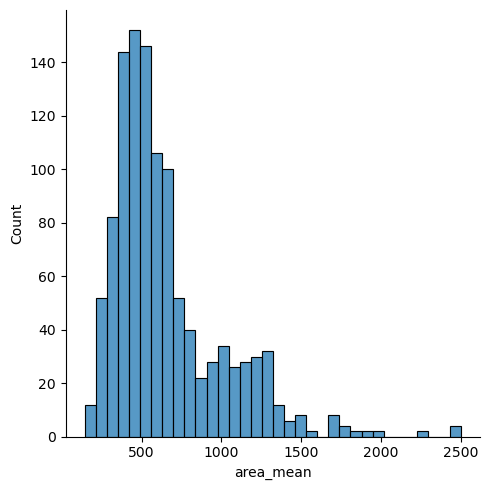

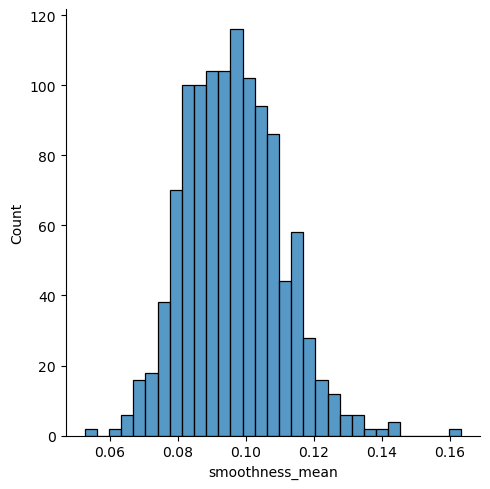

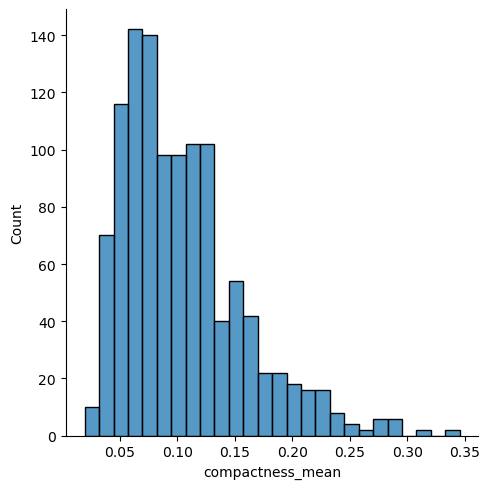

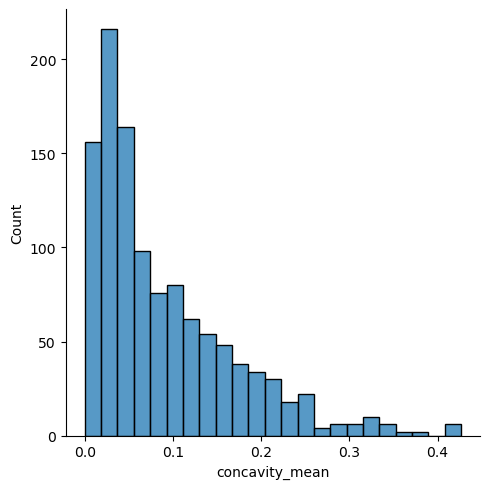

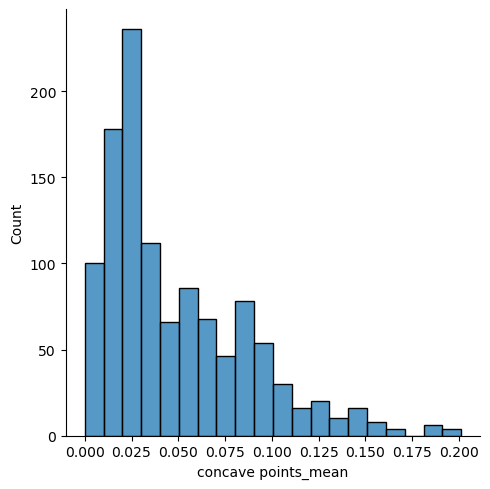

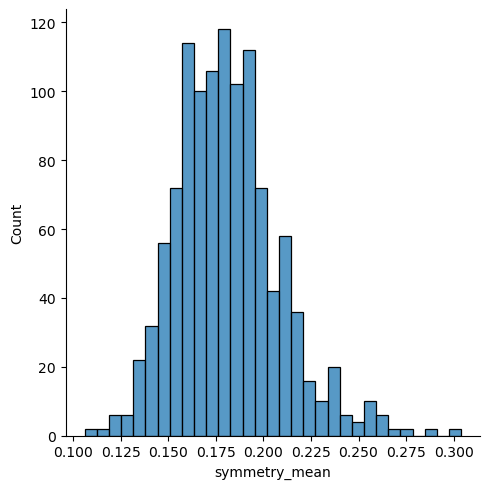

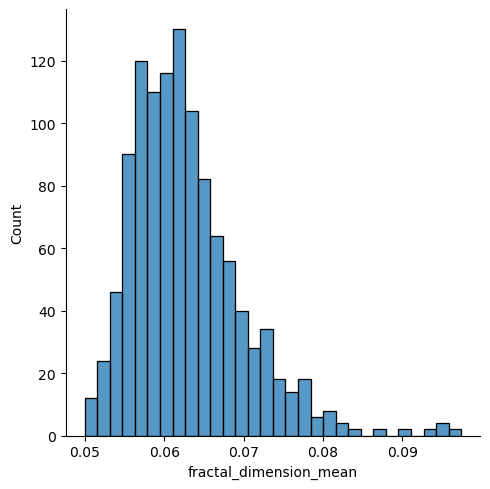

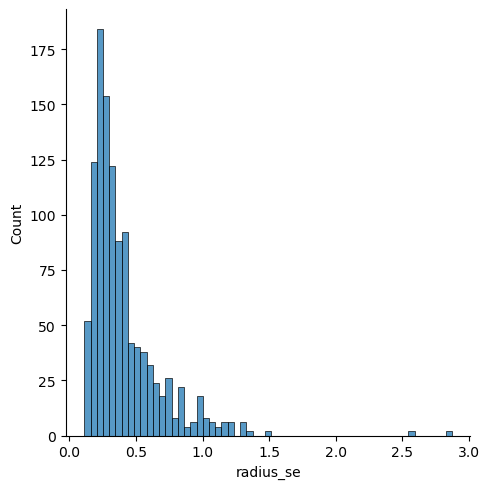

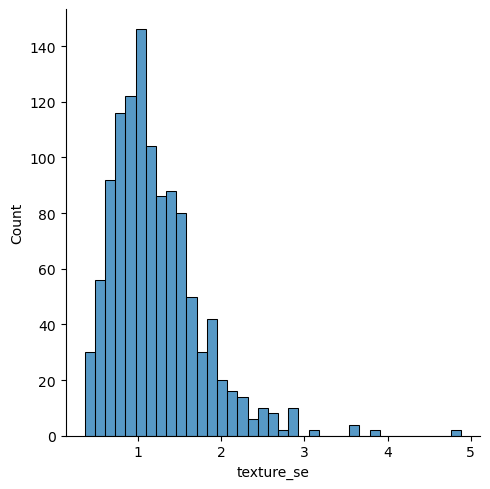

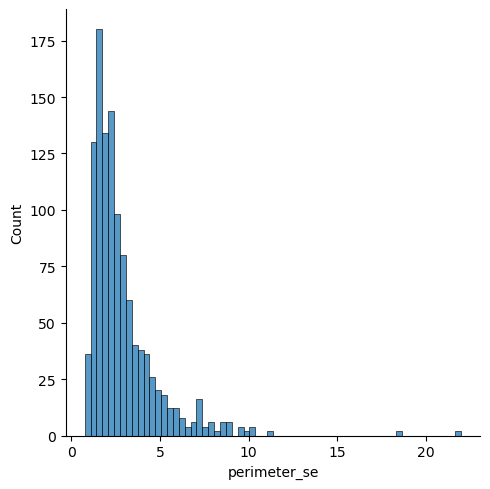

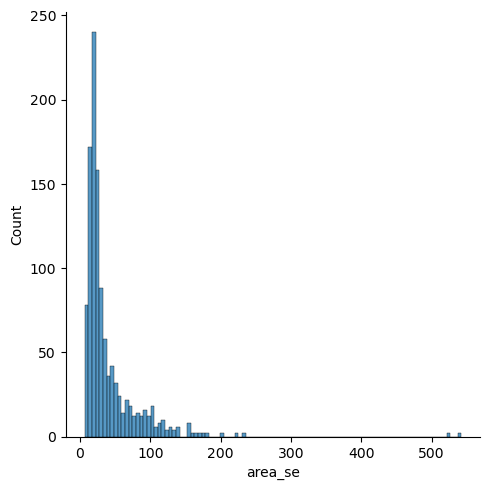

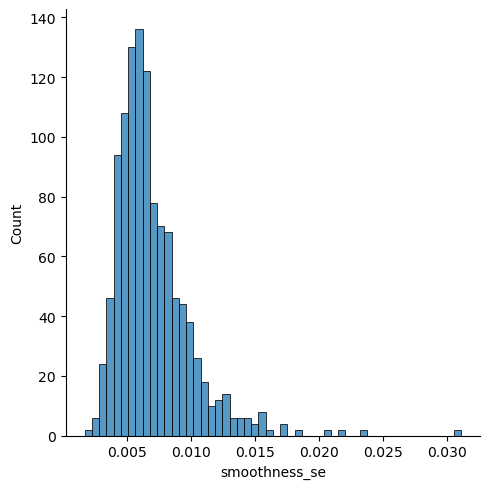

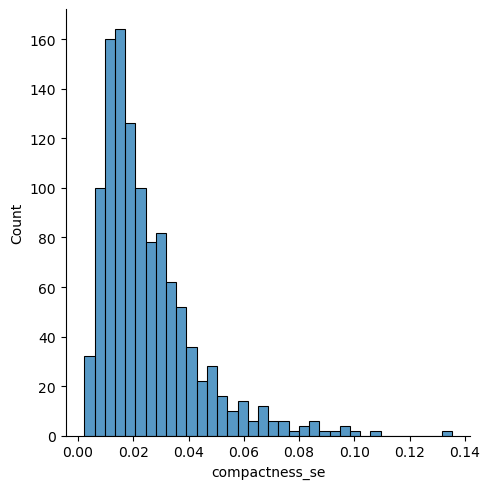

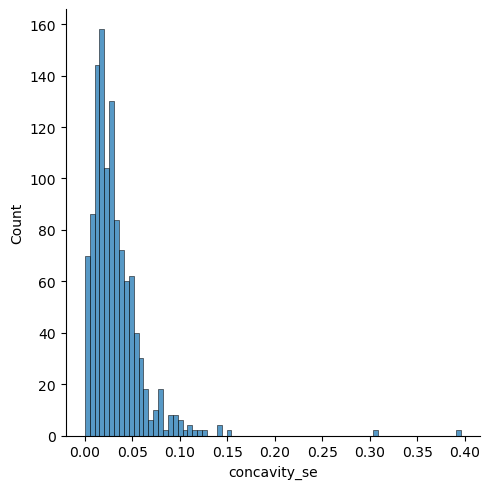

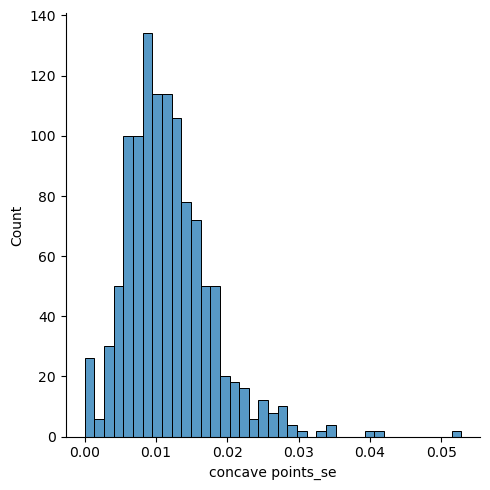

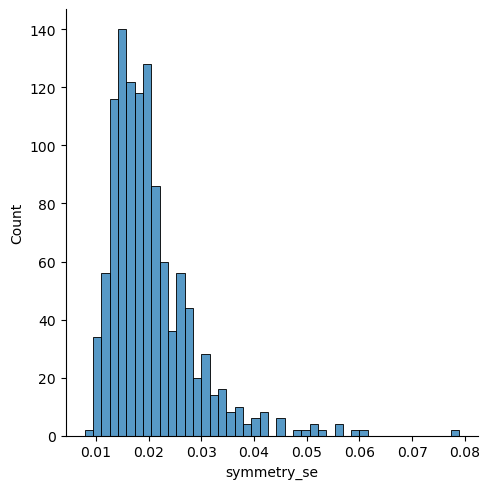

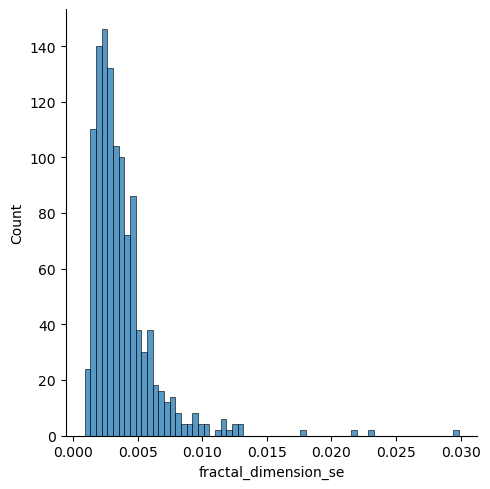

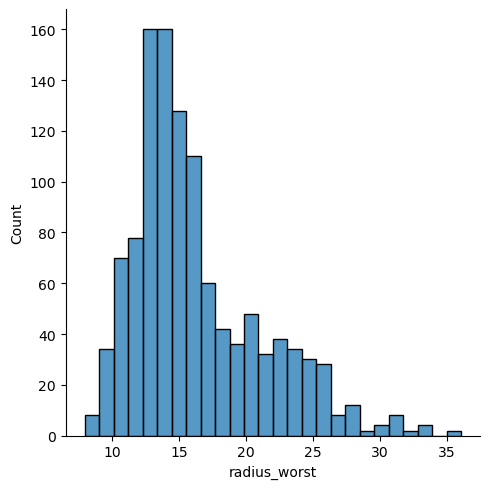

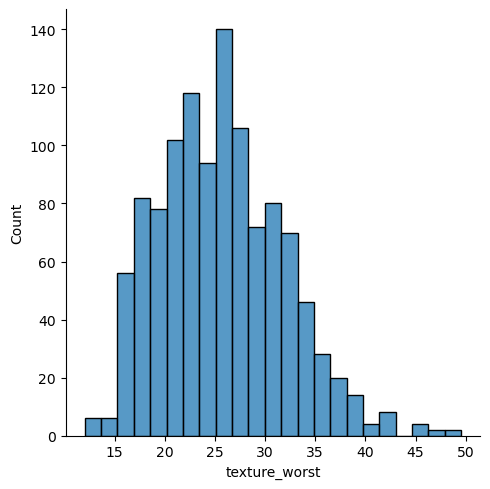

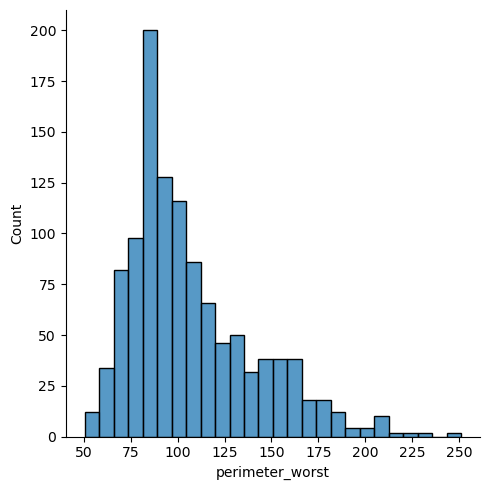

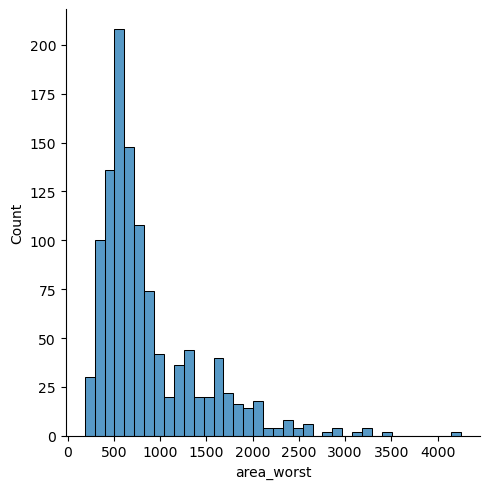

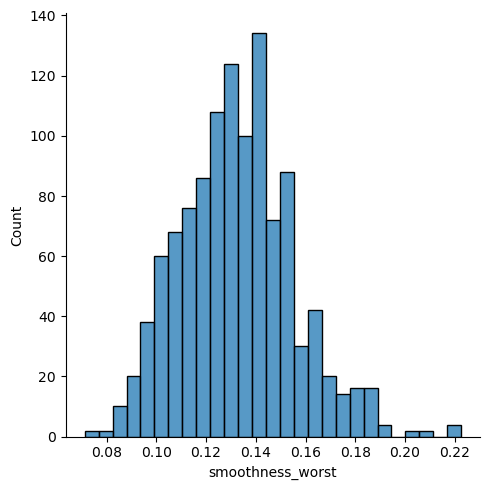

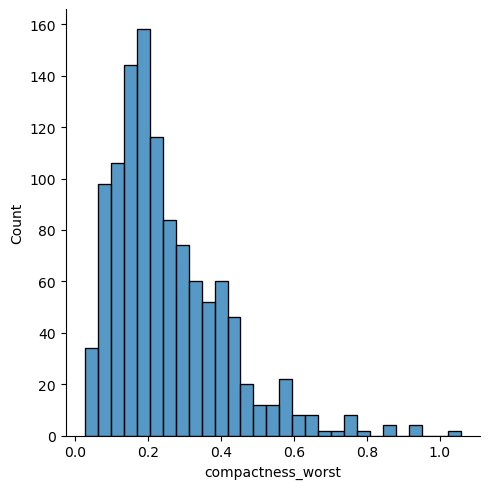

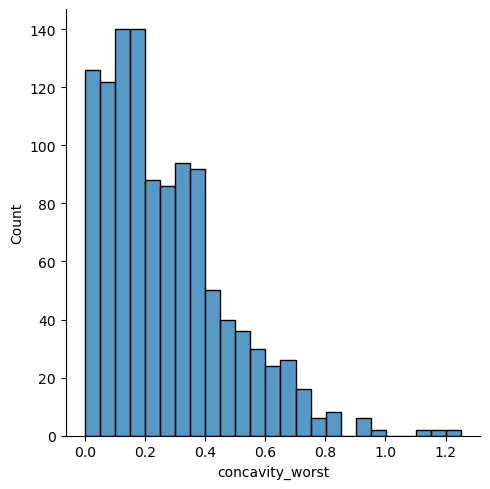

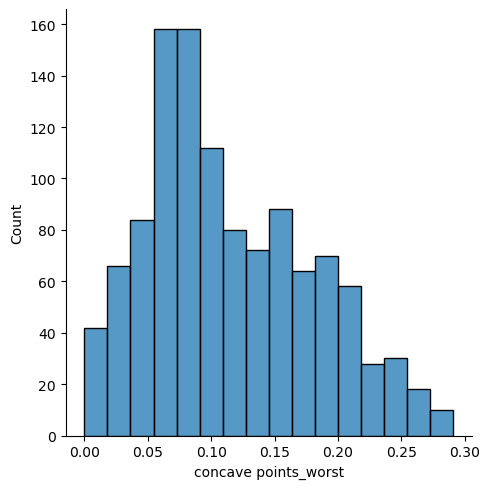

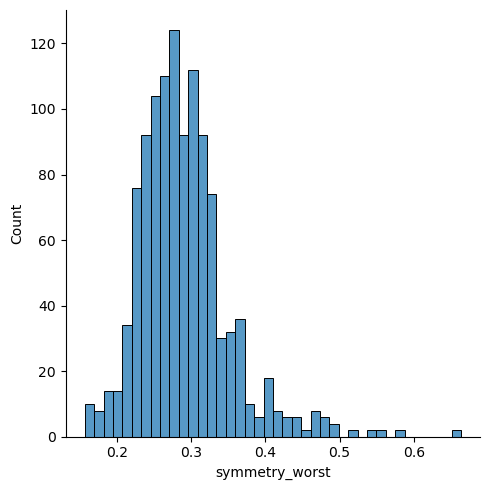

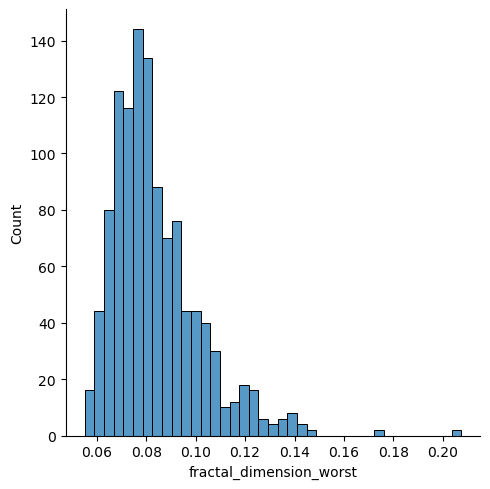

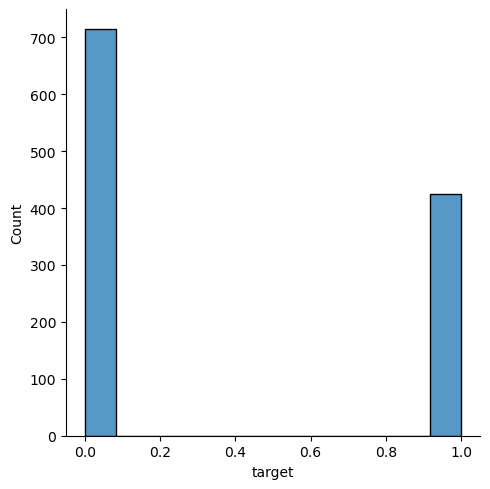

In [25]:
#creating a for loop to get the distribution plot for all columns

for column in breast_cancer_data:
    sns.displot(x=column, data= breast_cancer_data)

In [26]:
#Correlation of other features with breast cancer

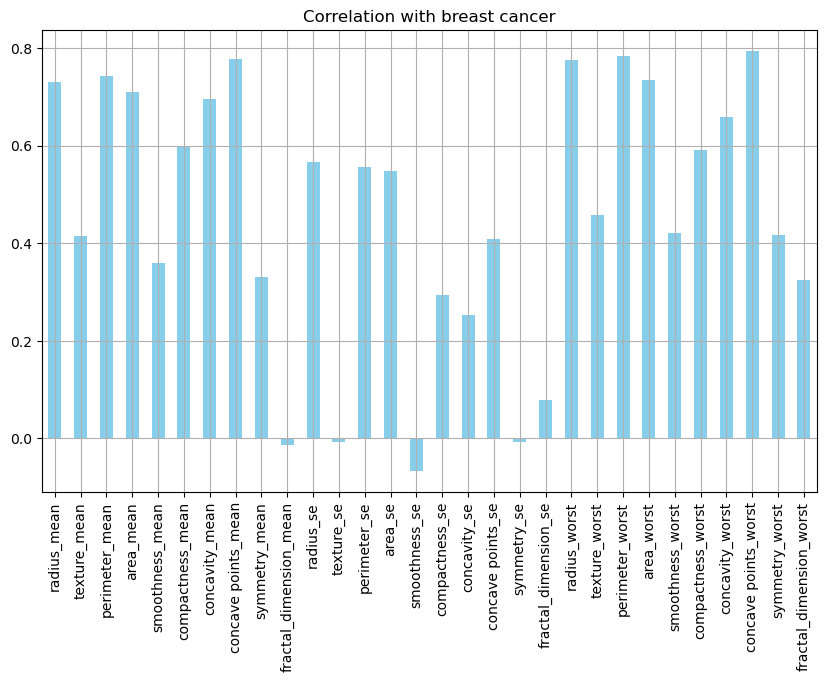

In [27]:
breast_cancer_data.drop('target', axis=1).corrwith(breast_cancer_data.target).plot(kind='bar',grid=True, figsize=(10,6), title="Correlation with breast cancer", color='skyblue');

In [28]:
#Pairplot
sns.pairplot(breast_cancer_data)
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001427D8145E0> (for post_execute):


KeyboardInterrupt: 

In [29]:
#Scatter plot of first 2 columns
#Select first column of the dataframe as a series
first_column= breast_cancer_data.iloc[:,0]

#Select second column of the dataframe as a series
second_column= breast_cancer_data.iloc[:,1]

In [30]:
print(first_column)
print('.....................................')
print(second_column)

0       17.99
1       20.57
2       19.69
3       11.42
4       20.29
        ...  
1133    21.56
1134    20.13
1135    16.60
1136    20.60
1137     7.76
Name: radius_mean, Length: 1138, dtype: float64
.....................................
0       10.38
1       17.77
2       21.25
3       20.38
4       14.34
        ...  
1133    22.39
1134    28.25
1135    28.08
1136    29.33
1137    24.54
Name: texture_mean, Length: 1138, dtype: float64


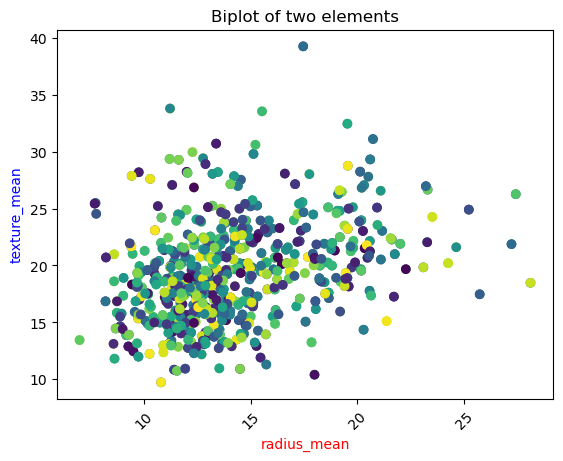

In [31]:
z = np.random.rand(1138)

colors = plt.cm.viridis(z)  # Convert z-coordinates to color values using a colormap


plt.scatter(x=first_column,y=second_column,c=colors)
# Set the x-axis color to red
plt.xlabel("radius_mean", color='red')

# Set the y-axis color to blue
plt.ylabel("texture_mean", color='blue')

# Add a title
plt.title("Biplot of two elements")

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Show the plot
plt.show()

C:\Users\GOKULDAS\AppData\Local\Temp\ipykernel_15556\3867834802.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


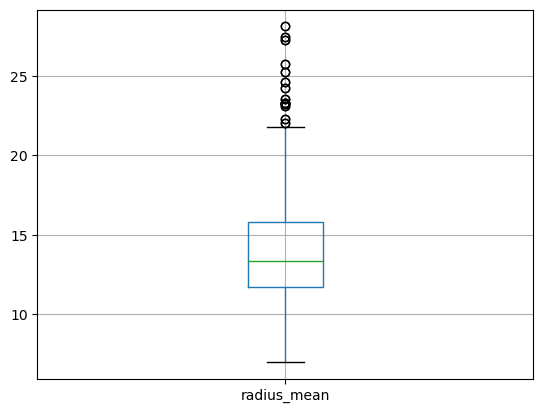

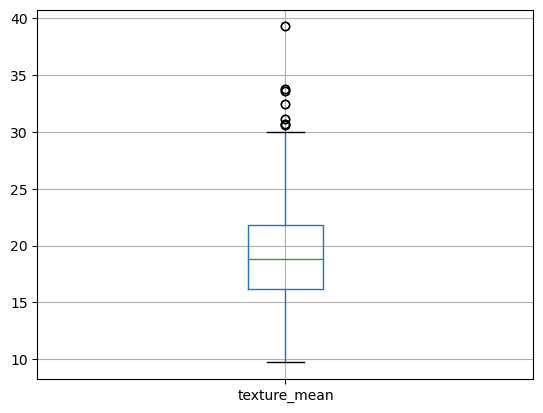

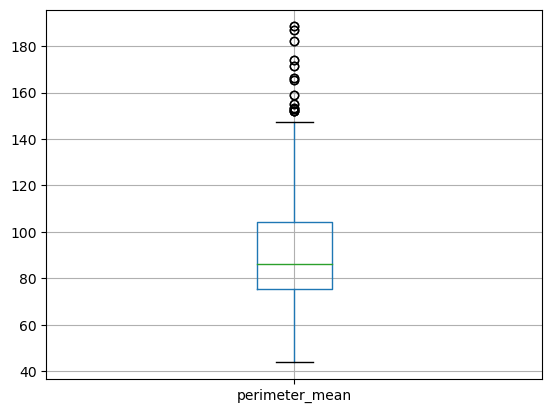

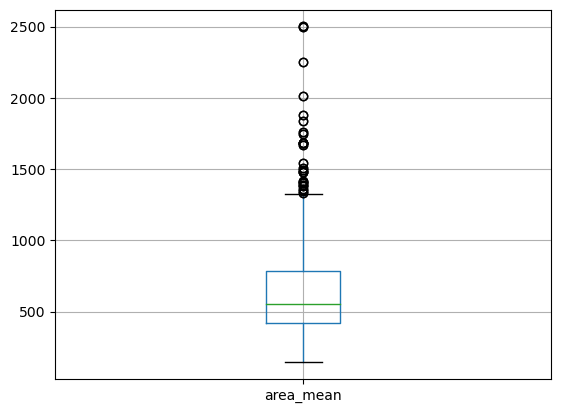

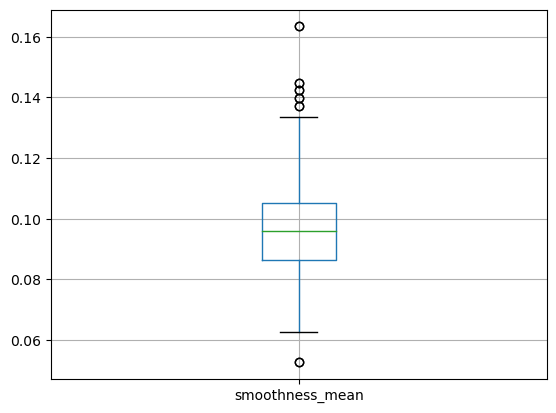

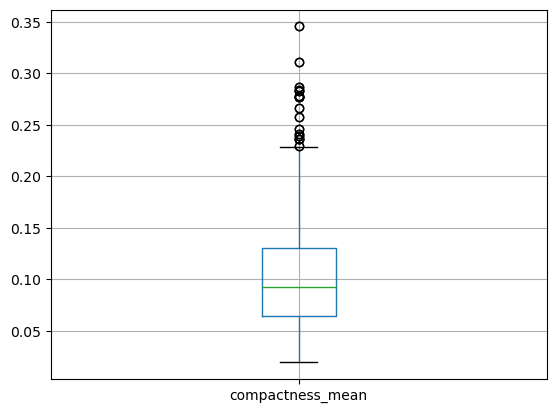

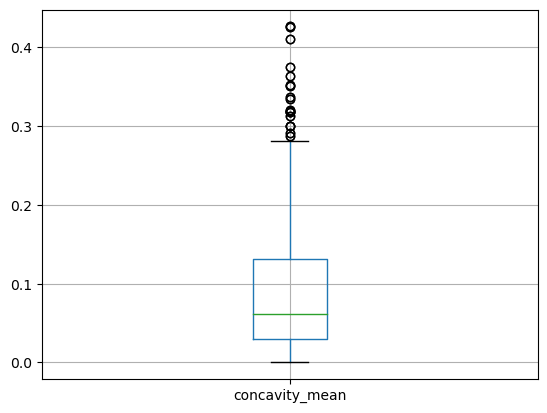

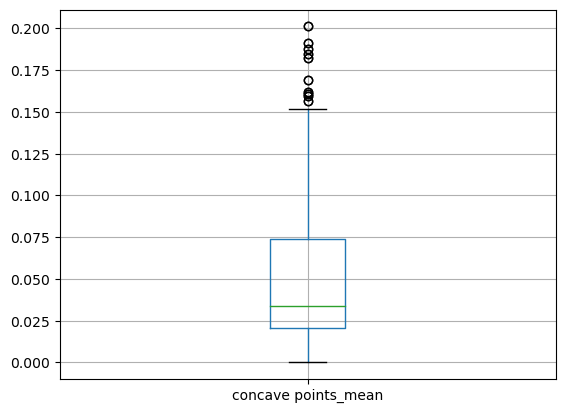

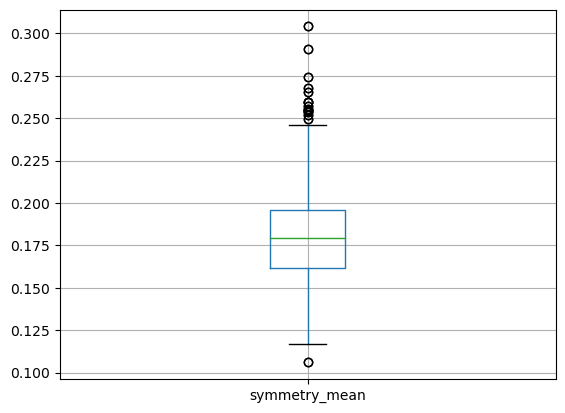

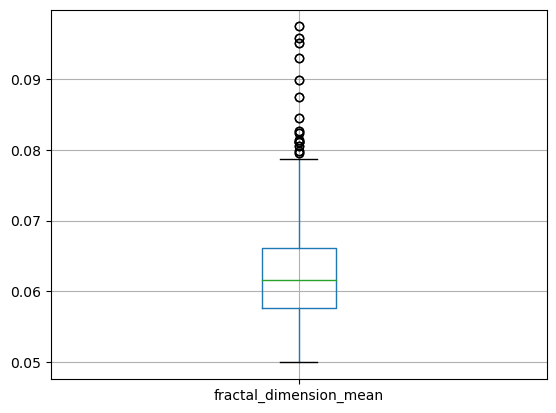

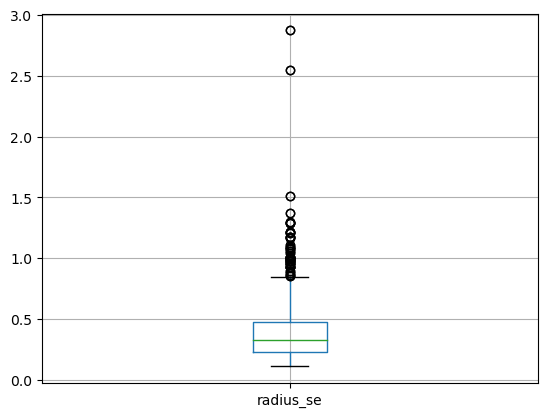

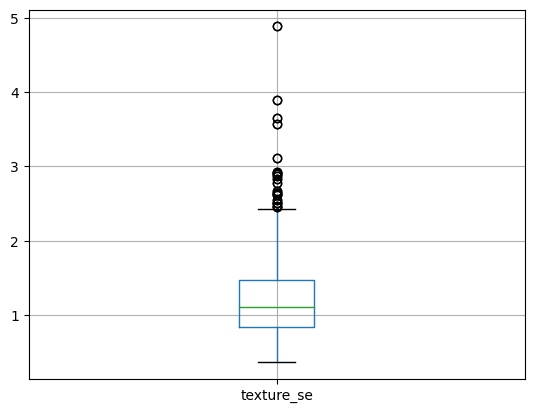

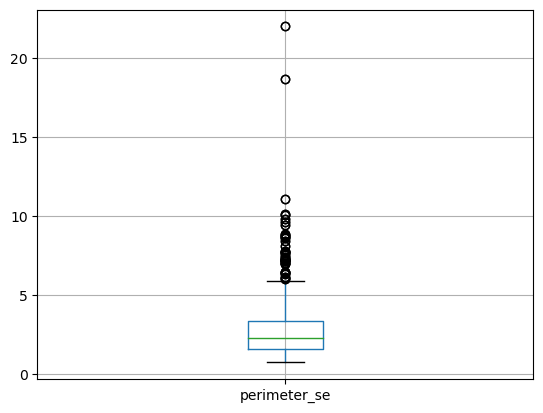

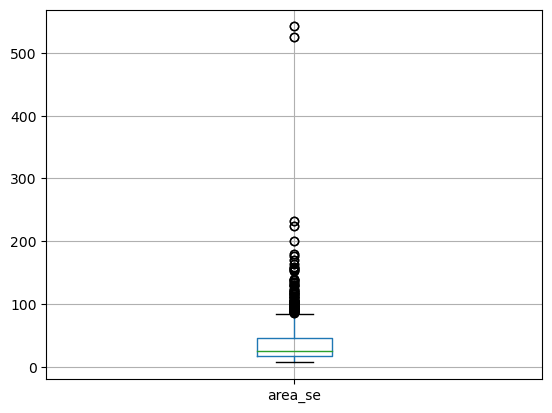

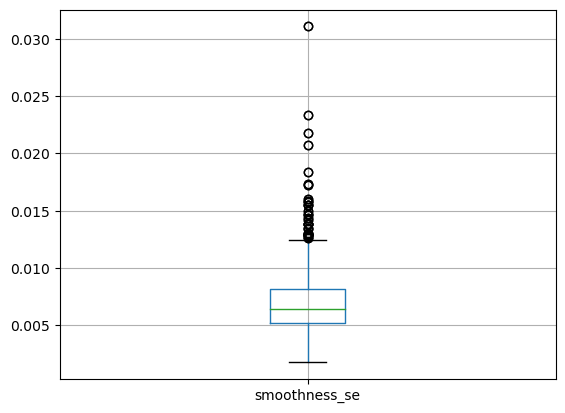

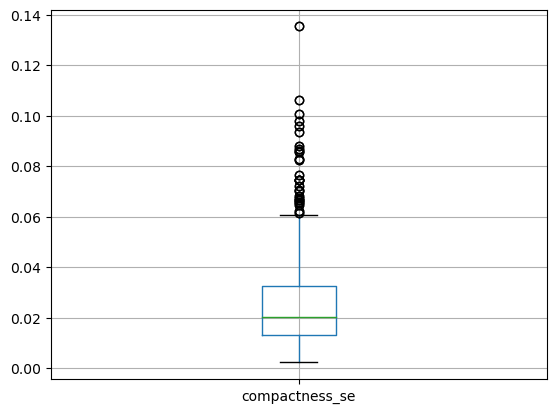

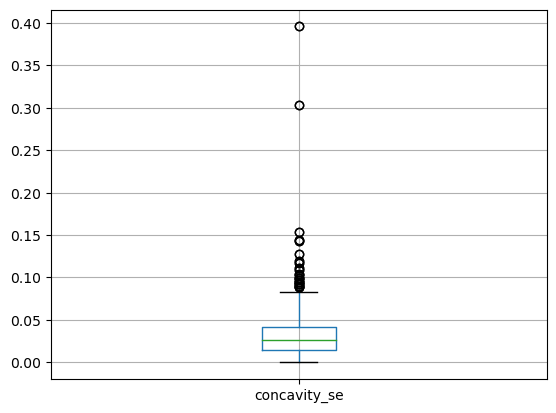

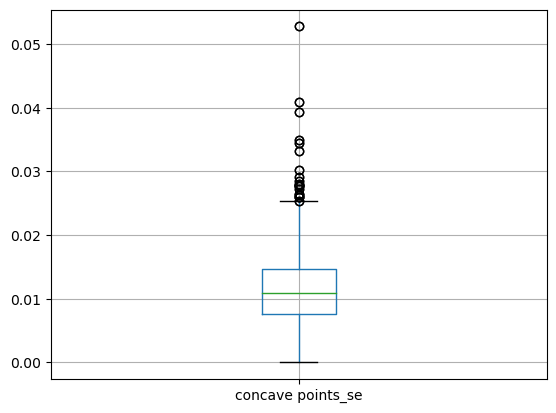

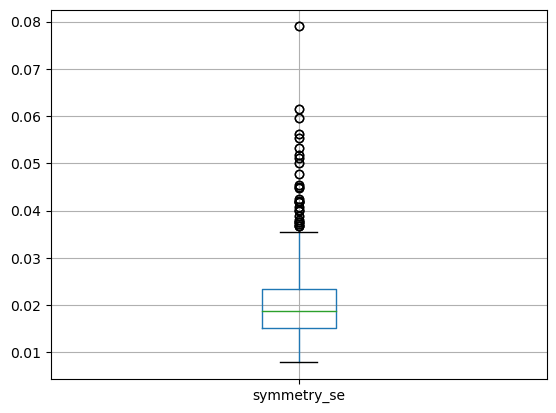

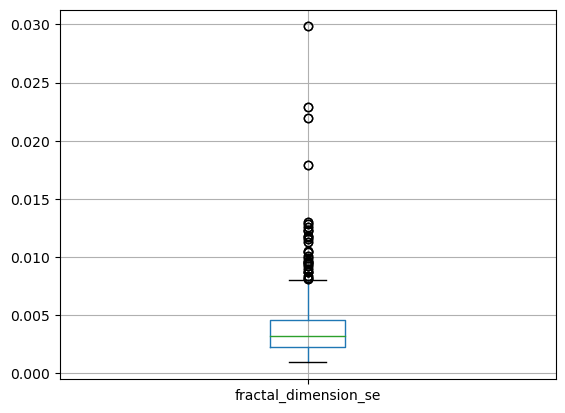

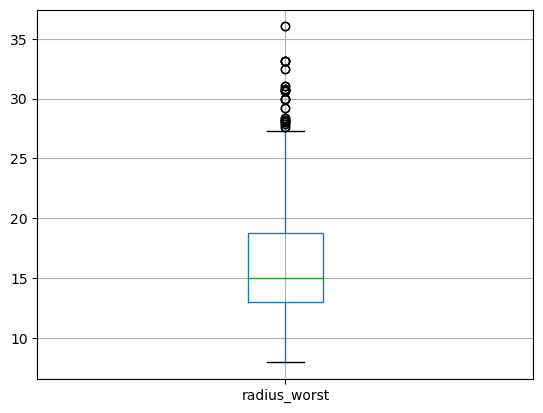

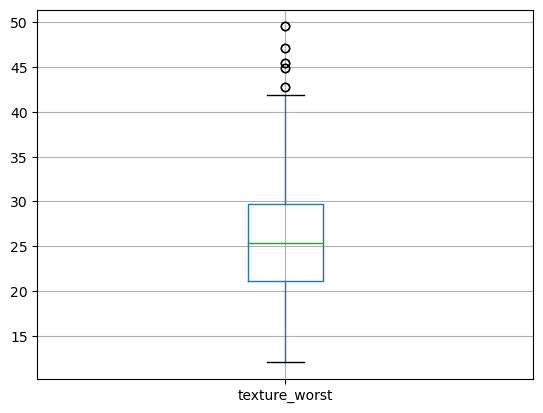

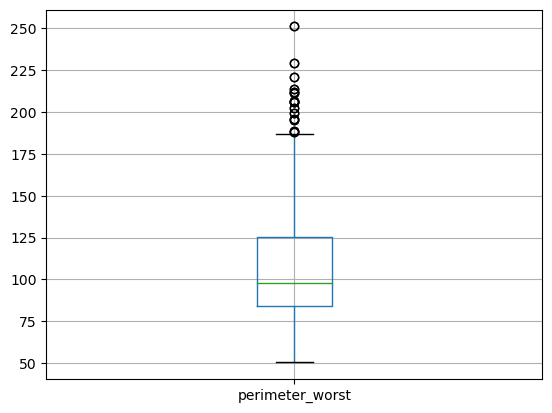

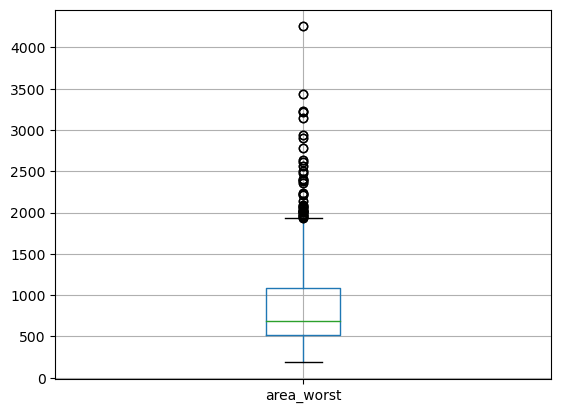

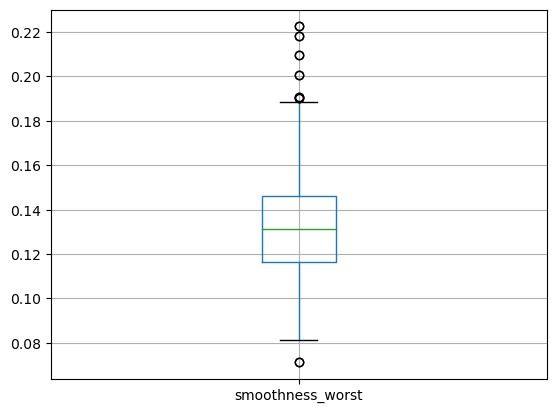

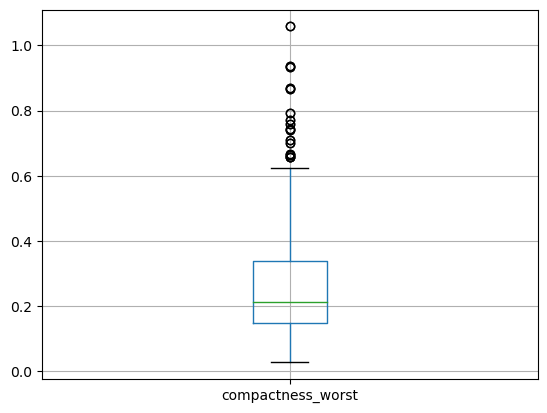

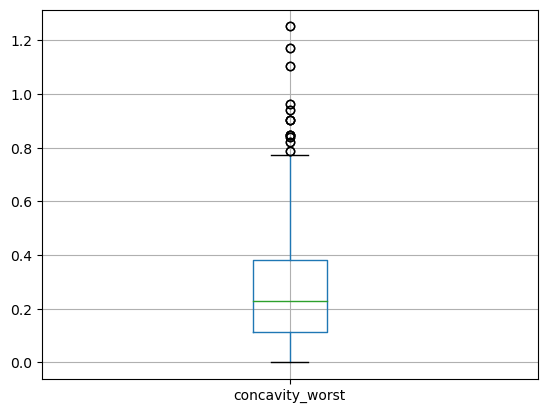

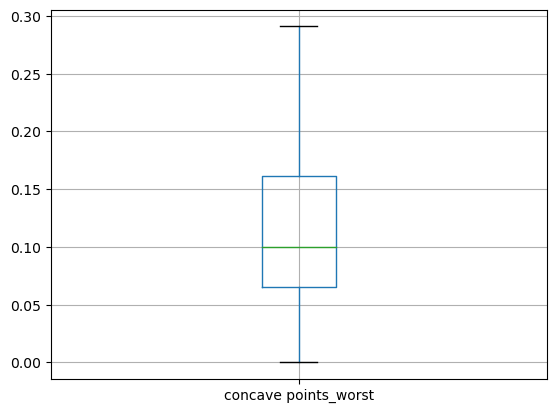

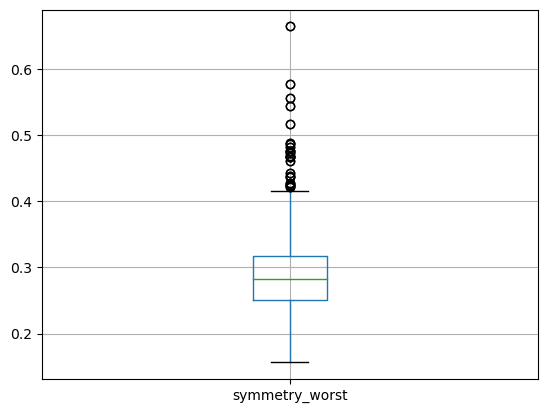

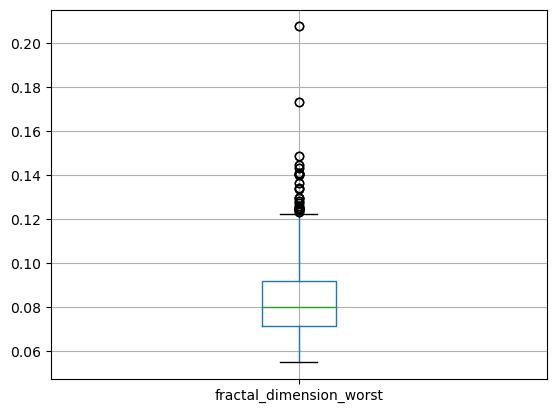

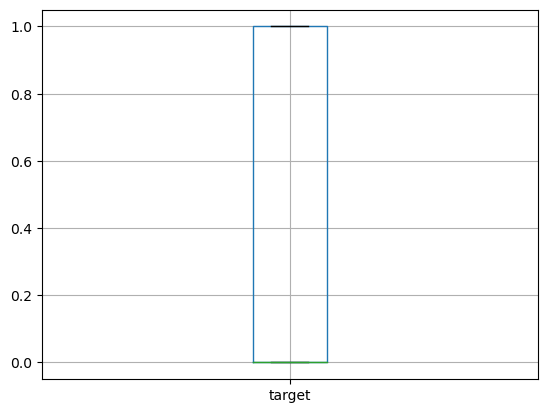

In [32]:
#Outliers Detection
for column in breast_cancer_data:
    plt.figure()
    breast_cancer_data.boxplot([column])

In [33]:
#Correlation Matrix
correlation_matrix= breast_cancer_data.corr()

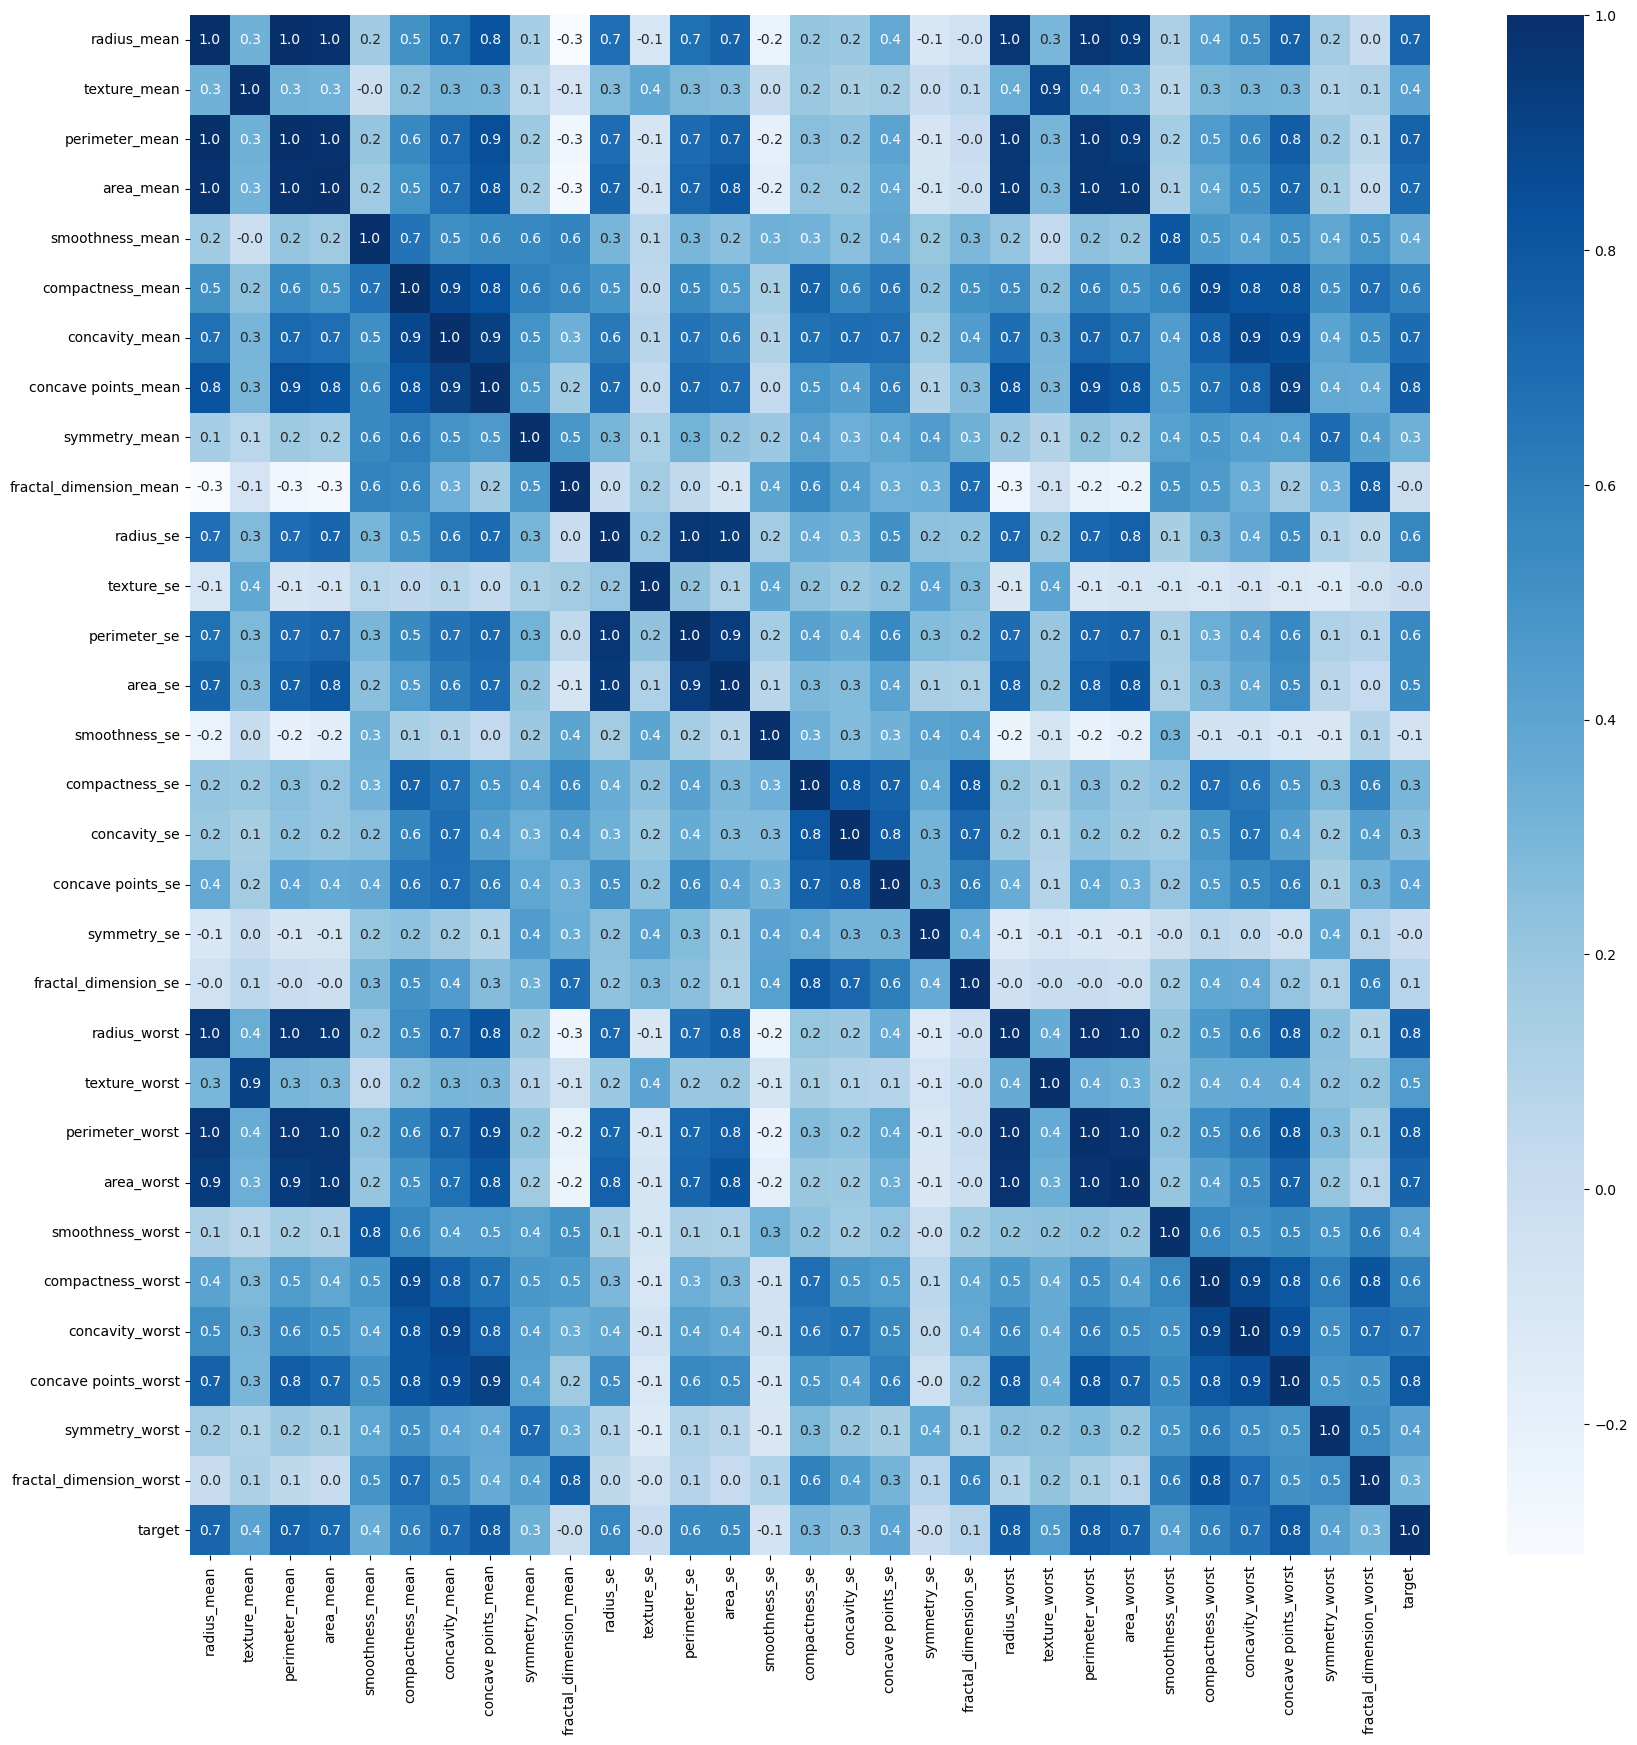

In [34]:
#construct a heat map to visualize the correlation matrix

plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, cbar=True, fmt='.1f',annot= True, cmap= 'Blues')
plt.savefig("correlation heat map")

In [35]:
#multicollinearity problem

In [36]:
#Grouping the data based on the target
breast_cancer_data.groupby('target').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
target,,,,,,,,,,,,,,,,,,,,,
0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [37]:
#Separating the data and label

#X =breast_cancer_data.drop(columns='target',axis=1)
#Y = breast_cancer_data['target']
Y = (breast_cancer_data['target']).astype(int)
X = breast_cancer_data.loc[:, breast_cancer_data.columns != 'target']

In [38]:
print(X)

      radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0           17.99         10.38          122.80     1001.0          0.11840   
1           20.57         17.77          132.90     1326.0          0.08474   
2           19.69         21.25          130.00     1203.0          0.10960   
3           11.42         20.38           77.58      386.1          0.14250   
4           20.29         14.34          135.10     1297.0          0.10030   
...           ...           ...             ...        ...              ...   
1133        21.56         22.39          142.00     1479.0          0.11100   
1134        20.13         28.25          131.20     1261.0          0.09780   
1135        16.60         28.08          108.30      858.1          0.08455   
1136        20.60         29.33          140.10     1265.0          0.11780   
1137         7.76         24.54           47.92      181.0          0.05263   

      compactness_mean  concavity_mean  concave poi

In [39]:
print(Y)

0       1
1       1
2       1
3       1
4       1
       ..
1133    1
1134    1
1135    1
1136    1
1137    0
Name: target, Length: 1138, dtype: int32


[0.05601285 0.01842851 0.06031322 0.05683364 0.0110005  0.01750928
 0.07307296 0.08325357 0.00703404 0.00539134 0.01872375 0.00614199
 0.02111969 0.03392241 0.00776178 0.00774917 0.00737144 0.00498151
 0.0051712  0.00593316 0.10271322 0.02371863 0.06070342 0.07735866
 0.02038211 0.02401008 0.04737492 0.11296577 0.01397293 0.00907426]


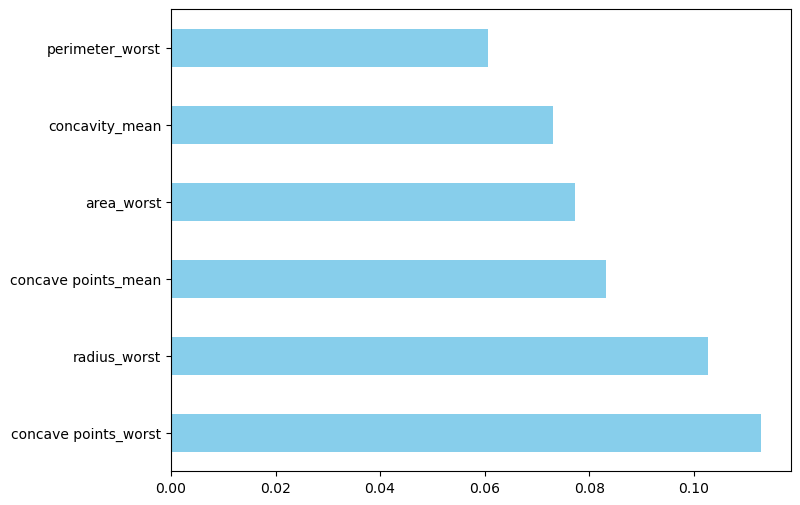

In [40]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_) 

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(8,6))
feat_importances.nlargest(6).plot(kind='barh',color='skyblue')
plt.show()

# Data Standardization

In [41]:
scalar= StandardScaler()

In [42]:
scalar.fit(X)

StandardScaler()

In [43]:
standardized_data= scalar.transform(X)

In [44]:
print(standardized_data)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


In [45]:
X= standardized_data

In [46]:
Y=breast_cancer_data['target']

# Splitting into train data and test data

In [47]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size= 0.2, stratify=Y,random_state=2)

In [48]:
print(X.shape,X_train.shape,X_test.shape)

(1138, 30) (910, 30) (228, 30)


# Model Fitting

# Support Vector Machine

In [49]:
svc = svm.SVC()


In [50]:
svc.fit(X_train, Y_train)


SVC()

In [51]:
pred_svc = svc.predict(X_test)
pred_svc

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1])

In [52]:
print(classification_report(Y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       143
           1       1.00      0.95      0.98        85

    accuracy                           0.98       228
   macro avg       0.99      0.98      0.98       228
weighted avg       0.98      0.98      0.98       228



In [53]:
# Calculate the accuracy score for the default SVC model
accuracy_svc = accuracy_score(Y_test, pred_svc)
print("Accuracy score for default SVC model:", accuracy_svc)

Accuracy score for default SVC model: 0.9824561403508771


# Turning for SVM

In [54]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100],
               'kernel': ['linear', 'poly', 'rbf'],
               'gamma': [0.01, 0.1, 1.0]}
 
gridsvm = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
gridsvm.fit(X_train, Y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.984 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.995 total time=   0.0s
[CV 3/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.956 total time=   0.0s
[CV 4/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.989 total time=   0.0s
[CV 5/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.967 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.703 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.681 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.648 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.676 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.703 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.956 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 3/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.967 total time=   0.0s
[CV 4/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.984 total time=   0.0s
[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.984 total time=   0.0s
[CV 1/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.989 total time=   0.0s
[CV 2/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.989 total time=   0.0s
[CV 3/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.989 total time=   0.0s
[CV 4/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.967 total time=   0.0s
[CV 5/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.973 total time=   0.0s
[CV 1/5] END ......C=10, gamma=0.1, kernel=poly;, score=0.995 total time=   0.0s
[CV 2/5] END ......C=10, gamma=0.1, kernel=poly;, score=0.989 total time=   0.0s
[CV 3/5] END ......C=10, gamma=0.1, kernel=poly;, score=0.973 total time=   0.0s
[CV 4/5] END ......C=10, gamma=0.1, kernel=poly;, score=0.995 total time=   0.0s
[CV 5/5] END ......C=10, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1.0],
                         'kernel': ['linear', 'poly', 'rbf']},
             verbose=3)

In [55]:
print(gridsvm.best_params_)

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [56]:
#Let's run our SVC again with the best parameters.
svc2 = svm.SVC(C = 100, gamma =  0.01, kernel= 'rbf')
svc2.fit(X_train, Y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(Y_test, pred_svc2))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       143
           1       1.00      0.96      0.98        85

    accuracy                           0.99       228
   macro avg       0.99      0.98      0.99       228
weighted avg       0.99      0.99      0.99       228



<Figure size 500x500 with 0 Axes>

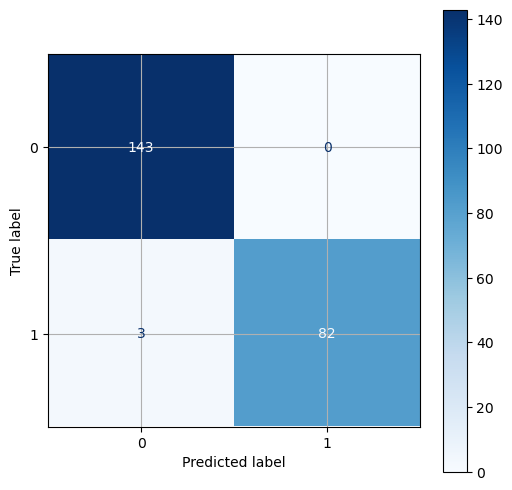

In [57]:
#confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, pred_svc2, labels=gridsvm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gridsvm.classes_)
fig = plt.figure(figsize=(5, 5))
disp.plot(cmap=plt.cm.Blues) 
plt.grid(which='major')     #remove cell gridlines
plt.gcf().set_size_inches(6, 6)   # Adjust the size of the plot
plt.show()

In [58]:
# Calculate the accuracy score for the SVC model with the best parameters
accuracy_svc2 = accuracy_score(Y_test, pred_svc2)
print("Accuracy score for SVC model with best parameters:", accuracy_svc2)

Accuracy score for SVC model with best parameters: 0.9868421052631579


In [59]:
svc2.score( X_test, Y_test)

0.9868421052631579

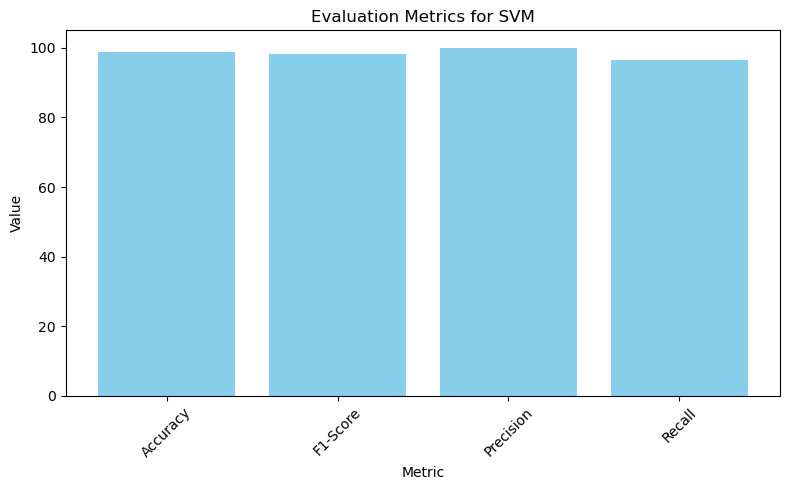

In [60]:
# Calculate and store the metrics
accuracy = accuracy_score(Y_test, pred_svc2)
f1 = f1_score(Y_test, pred_svc2)
precision = precision_score(Y_test, pred_svc2)
recall = recall_score(Y_test, pred_svc2)

# Create a DataFrame to store the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'F1-Score', 'Precision', 'Recall'],
    'Value': [accuracy*100, f1*100, precision*100, recall*100]
})


# Create a bar chart to visualize the metrics
plt.figure(figsize=(8, 5))
plt.bar(metrics_df['Metric'], metrics_df['Value'],color='skyblue')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Evaluation Metrics for SVM')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Logistic regresssion

In [61]:
log= LogisticRegression()

In [62]:
log.fit(X_train,Y_train)

LogisticRegression()

In [63]:
pred_log = log.predict(X_test)
pred_log



array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1])

In [64]:
print(classification_report(Y_test, pred_log))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       143
           1       0.99      0.95      0.97        85

    accuracy                           0.98       228
   macro avg       0.98      0.97      0.98       228
weighted avg       0.98      0.98      0.98       228



In [65]:
# Calculate the accuracy score for the default Logistic regresssion model
accuracy_log = accuracy_score(Y_test, pred_log)
print("Accuracy score for default Logistic regresssion model:", accuracy_log)

Accuracy score for default Logistic regresssion model: 0.9780701754385965


# Turning for Logistic regresssion

In [66]:
# defining parameter range
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
               'solver': ['lbfgs', 'sag', 'newton-cg']}

 
gridlog = GridSearchCV(LogisticRegression(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
gridlog.fit(X_train, Y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END ..............C=0.01, solver=lbfgs;, score=0.956 total time=   0.0s
[CV 2/5] END ..............C=0.01, solver=lbfgs;, score=0.967 total time=   0.0s
[CV 3/5] END ..............C=0.01, solver=lbfgs;, score=0.934 total time=   0.0s
[CV 4/5] END ..............C=0.01, solver=lbfgs;, score=0.989 total time=   0.0s
[CV 5/5] END ..............C=0.01, solver=lbfgs;, score=0.934 total time=   0.0s
[CV 1/5] END ................C=0.01, solver=sag;, score=0.956 total time=   0.0s
[CV 2/5] END ................C=0.01, solver=sag;, score=0.967 total time=   0.0s
[CV 3/5] END ................C=0.01, solver=sag;, score=0.934 total time=   0.0s
[CV 4/5] END ................C=0.01, solver=sag;, score=0.989 total time=   0.0s
[CV 5/5] END ................C=0.01, solver=sag;, score=0.934 total time=   0.0s
[CV 1/5] END ..........C=0.01, solver=newton-cg;, score=0.956 total time=   0.0s
[CV 2/5] END ..........C=0.01, solver=newton-cg;

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END .............C=1, solver=newton-cg;, score=0.989 total time=   0.0s
[CV 2/5] END .............C=1, solver=newton-cg;, score=0.989 total time=   0.0s
[CV 3/5] END .............C=1, solver=newton-cg;, score=0.984 total time=   0.0s
[CV 4/5] END .............C=1, solver=newton-cg;, score=0.984 total time=   0.0s
[CV 5/5] END .............C=1, solver=newton-cg;, score=0.962 total time=   0.0s
[CV 1/5] END ................C=10, solver=lbfgs;, score=0.989 total time=   0.0s
[CV 2/5] END ................C=10, solver=lbfgs;, score=0.989 total time=   0.0s
[CV 3/5] END ................C=10, solver=lbfgs;, score=0.989 total time=   0.0s
[CV 4/5] END ................C=10, solver=lbfgs;, score=0.967 total time=   0.0s
[CV 5/5] END ................C=10, solver=lbfgs;, score=0.962 total time=   0.0s
[CV 1/5] END ..................C=10, solver=sag;, score=0.989 total time=   0.0s
[CV 2/5] END ..................C=10, solver=sag;, score=0.989 total time=   0.0s
[CV 3/5] END ...............

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ............C=10, solver=newton-cg;, score=0.989 total time=   0.0s
[CV 2/5] END ............C=10, solver=newton-cg;, score=0.989 total time=   0.0s
[CV 3/5] END ............C=10, solver=newton-cg;, score=0.989 total time=   0.0s
[CV 4/5] END ............C=10, solver=newton-cg;, score=0.967 total time=   0.0s
[CV 5/5] END ............C=10, solver=newton-cg;, score=0.962 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 1/5] END ...............C=100, solver=lbfgs;, score=0.989 total time=   0.0s
[CV 2/5] END ...............C=100, solver=lbfgs;, score=0.984 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 3/5] END ...............C=100, solver=lbfgs;, score=0.984 total time=   0.0s
[CV 4/5] END ...............C=100, solver=lbfgs;, score=0.967 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which me

[CV 5/5] END ...............C=100, solver=lbfgs;, score=0.956 total time=   0.0s
[CV 1/5] END .................C=100, solver=sag;, score=0.989 total time=   0.0s
[CV 2/5] END .................C=100, solver=sag;, score=0.989 total time=   0.0s
[CV 3/5] END .................C=100, solver=sag;, score=0.989 total time=   0.0s
[CV 4/5] END .................C=100, solver=sag;, score=0.978 total time=   0.0s
[CV 5/5] END .................C=100, solver=sag;, score=0.962 total time=   0.0s
[CV 1/5] END ...........C=100, solver=newton-cg;, score=0.989 total time=   0.1s
[CV 2/5] END ...........C=100, solver=newton-cg;, score=0.984 total time=   0.1s
[CV 3/5] END ...........C=100, solver=newton-cg;, score=0.984 total time=   0.1s
[CV 4/5] END ...........C=100, solver=newton-cg;, score=0.967 total time=   0.0s
[CV 5/5] END ...........C=100, solver=newton-cg;, score=0.956 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'solver': ['lbfgs', 'sag', 'newton-cg']},
             verbose=3)

In [67]:
print(gridlog.best_params_)

{'C': 1, 'solver': 'sag'}


In [68]:
#Let's run our SVC again with the best parameters.
log2 = LogisticRegression(C= 1,
    solver= 'sag',)
log2.fit(X_train, Y_train)
pred_log2 = log2.predict(X_test)
print(classification_report(Y_test, pred_log2))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       143
           1       0.99      0.95      0.97        85

    accuracy                           0.98       228
   macro avg       0.98      0.97      0.98       228
weighted avg       0.98      0.98      0.98       228



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


<Figure size 500x500 with 0 Axes>

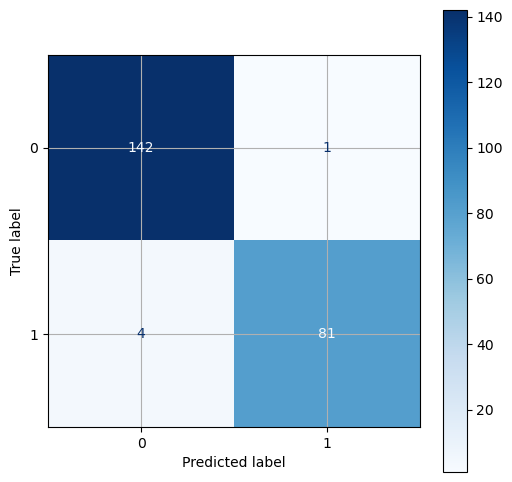

In [69]:
#confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, pred_log2, labels=gridlog.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gridlog.classes_)
fig = plt.figure(figsize=(5, 5))
disp.plot(cmap=plt.cm.Blues) 
plt.grid(which='major')     #remove cell gridlines
plt.gcf().set_size_inches(6, 6)   # Adjust the size of the plot
plt.show()

In [70]:
# Calculate the accuracy score for the Logistic regresssion model with the best parameters
accuracy_log2 = accuracy_score(Y_test, pred_log2)
print("Accuracy score for Logistic regresssion model with best parameters:", accuracy_log2)

Accuracy score for Logistic regresssion model with best parameters: 0.9780701754385965


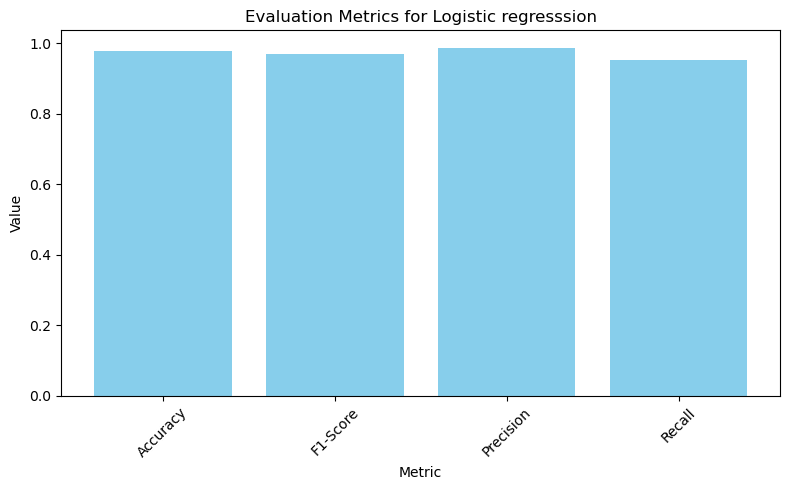

In [71]:
# Calculate and store the metrics
accuracy = accuracy_score(Y_test,pred_log2)
f1 = f1_score(Y_test, pred_log2)
precision = precision_score(Y_test, pred_log2)
recall = recall_score(Y_test, pred_log2)

# Create a DataFrame to store the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'F1-Score', 'Precision', 'Recall'],
    'Value': [accuracy, f1, precision, recall]
})

# Create a bar chart to visualize the metrics
plt.figure(figsize=(8, 5))
plt.bar(metrics_df['Metric'], metrics_df['Value'],color='skyblue')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Evaluation Metrics for Logistic regresssion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# KNN

In [72]:
knn=KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [73]:
pred_knn = knn.predict(X_test)
pred_knn


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1])

In [74]:
print(classification_report(Y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       143
           1       1.00      0.92      0.96        85

    accuracy                           0.97       228
   macro avg       0.98      0.96      0.97       228
weighted avg       0.97      0.97      0.97       228



In [75]:
# Calculate the accuracy score for the default KNN model
accuracy_knn = accuracy_score(Y_test, pred_knn)
print("Accuracy score for default KNN model:", accuracy_knn)

Accuracy score for default KNN model: 0.9692982456140351


# Turning for K Nearest Neighbors

In [76]:
from sklearn.model_selection import GridSearchCV
# defining parameter range
param_grid = {'n_neighbors': [1,3,5,7,9,11,13,15,17,19],  #odd numbers because there are 2 classes in target coulmn
              'weights': ['distance', 'uniform']}  
gridKNN = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
gridKNN.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ...n_neighbors=1, weights=distance;, score=0.995 total time=   0.0s
[CV 2/5] END ...n_neighbors=1, weights=distance;, score=1.000 total time=   0.0s
[CV 3/5] END ...n_neighbors=1, weights=distance;, score=0.951 total time=   0.0s
[CV 4/5] END ...n_neighbors=1, weights=distance;, score=0.984 total time=   0.0s
[CV 5/5] END ...n_neighbors=1, weights=distance;, score=0.967 total time=   0.0s
[CV 1/5] END ....n_neighbors=1, weights=uniform;, score=0.995 total time=   0.0s
[CV 2/5] END ....n_neighbors=1, weights=uniform;, score=1.000 total time=   0.0s
[CV 3/5] END ....n_neighbors=1, weights=uniform;, score=0.951 total time=   0.0s
[CV 4/5] END ....n_neighbors=1, weights=uniform;, score=0.984 total time=   0.0s
[CV 5/5] END ....n_neighbors=1, weights=uniform;, score=0.967 total time=   0.0s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.989 total time=   0.0s
[CV 2/5] END ...n_neighbors=3, weights=distance

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.962 total time=   0.0s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.984 total time=   0.0s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.951 total time=   0.0s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.967 total time=   0.0s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.951 total time=   0.0s
[CV 1/5] END ...n_neighbors=5, weights=distance;, score=1.000 total time=   0.0s
[CV 2/5] END ...n_neighbors=5, weights=distance;, score=1.000 total time=   0.0s
[CV 3/5] END ...n_neighbors=5, weights=distance;, score=0.962 total time=   0.0s
[CV 4/5] END ...n_neighbors=5, weights=distance;, score=0.989 total time=   0.0s
[CV 5/5] END ...n_neighbors=5, weights=distance;, score=0.973 total time=   0.0s
[CV 1/5] END ....n_neighbors=5, weights=uniform;, score=0.984 total time=   0.0s
[CV 2/5] END ....n_neighbors=5, weights=uniform;, score=0.989 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[CV 3/5] END ....n_neighbors=5, weights=uniform;, score=0.951 total time=   0.0s
[CV 4/5] END ....n_neighbors=5, weights=uniform;, score=0.989 total time=   0.0s
[CV 5/5] END ....n_neighbors=5, weights=uniform;, score=0.962 total time=   0.0s
[CV 1/5] END ...n_neighbors=7, weights=distance;, score=0.995 total time=   0.0s
[CV 2/5] END ...n_neighbors=7, weights=distance;, score=1.000 total time=   0.0s
[CV 3/5] END ...n_neighbors=7, weights=distance;, score=0.962 total time=   0.0s
[CV 4/5] END ...n_neighbors=7, weights=distance;, score=0.989 total time=   0.0s
[CV 5/5] END ...n_neighbors=7, weights=distance;, score=0.973 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[CV 1/5] END ....n_neighbors=7, weights=uniform;, score=0.978 total time=   0.0s
[CV 2/5] END ....n_neighbors=7, weights=uniform;, score=1.000 total time=   0.0s
[CV 3/5] END ....n_neighbors=7, weights=uniform;, score=0.945 total time=   0.0s
[CV 4/5] END ....n_neighbors=7, weights=uniform;, score=0.989 total time=   0.0s
[CV 5/5] END ....n_neighbors=7, weights=uniform;, score=0.962 total time=   0.0s
[CV 1/5] END ...n_neighbors=9, weights=distance;, score=0.995 total time=   0.0s
[CV 2/5] END ...n_neighbors=9, weights=distance;, score=1.000 total time=   0.0s
[CV 3/5] END ...n_neighbors=9, weights=distance;, score=0.962 total time=   0.0s
[CV 4/5] END ...n_neighbors=9, weights=distance;, score=0.995 total time=   0.0s
[CV 5/5] END ...n_neighbors=9, weights=distance;, score=0.967 total time=   0.0s
[CV 1/5] END ....n_neighbors=9, weights=uniform;, score=0.973 total time=   0.0s
[CV 2/5] END ....n_neighbors=9, weights=uniform;, score=0.995 total time=   0.0s
[CV 3/5] END ....n_neighbors

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[CV 4/5] END ....n_neighbors=9, weights=uniform;, score=0.995 total time=   0.0s
[CV 5/5] END ....n_neighbors=9, weights=uniform;, score=0.951 total time=   0.0s
[CV 1/5] END ..n_neighbors=11, weights=distance;, score=0.995 total time=   0.0s
[CV 2/5] END ..n_neighbors=11, weights=distance;, score=1.000 total time=   0.0s
[CV 3/5] END ..n_neighbors=11, weights=distance;, score=0.962 total time=   0.0s
[CV 4/5] END ..n_neighbors=11, weights=distance;, score=0.995 total time=   0.0s
[CV 5/5] END ..n_neighbors=11, weights=distance;, score=0.967 total time=   0.0s
[CV 1/5] END ...n_neighbors=11, weights=uniform;, score=0.978 total time=   0.0s
[CV 2/5] END ...n_neighbors=11, weights=uniform;, score=0.995 total time=   0.0s
[CV 3/5] END ...n_neighbors=11, weights=uniform;, score=0.940 total time=   0.0s
[CV 4/5] END ...n_neighbors=11, weights=uniform;, score=0.995 total time=   0.0s
[CV 5/5] END ...n_neighbors=11, weights=uniform;, score=0.956 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[CV 1/5] END ..n_neighbors=13, weights=distance;, score=0.995 total time=   0.0s
[CV 2/5] END ..n_neighbors=13, weights=distance;, score=1.000 total time=   0.0s
[CV 3/5] END ..n_neighbors=13, weights=distance;, score=0.962 total time=   0.0s
[CV 4/5] END ..n_neighbors=13, weights=distance;, score=0.995 total time=   0.0s
[CV 5/5] END ..n_neighbors=13, weights=distance;, score=0.984 total time=   0.0s
[CV 1/5] END ...n_neighbors=13, weights=uniform;, score=0.973 total time=   0.0s
[CV 2/5] END ...n_neighbors=13, weights=uniform;, score=0.995 total time=   0.0s
[CV 3/5] END ...n_neighbors=13, weights=uniform;, score=0.940 total time=   0.0s
[CV 4/5] END ...n_neighbors=13, weights=uniform;, score=0.989 total time=   0.0s
[CV 5/5] END ...n_neighbors=13, weights=uniform;, score=0.967 total time=   0.0s
[CV 1/5] END ..n_neighbors=15, weights=distance;, score=0.995 total time=   0.0s
[CV 2/5] END ..n_neighbors=15, weights=distance;, score=1.000 total time=   0.0s
[CV 3/5] END ..n_neighbors=1

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[CV 3/5] END ...n_neighbors=15, weights=uniform;, score=0.934 total time=   0.0s
[CV 4/5] END ...n_neighbors=15, weights=uniform;, score=0.995 total time=   0.0s
[CV 5/5] END ...n_neighbors=15, weights=uniform;, score=0.951 total time=   0.0s
[CV 1/5] END ..n_neighbors=17, weights=distance;, score=0.995 total time=   0.0s
[CV 2/5] END ..n_neighbors=17, weights=distance;, score=1.000 total time=   0.0s
[CV 3/5] END ..n_neighbors=17, weights=distance;, score=0.962 total time=   0.0s
[CV 4/5] END ..n_neighbors=17, weights=distance;, score=0.995 total time=   0.0s
[CV 5/5] END ..n_neighbors=17, weights=distance;, score=0.967 total time=   0.0s
[CV 1/5] END ...n_neighbors=17, weights=uniform;, score=0.973 total time=   0.0s
[CV 2/5] END ...n_neighbors=17, weights=uniform;, score=0.995 total time=   0.0s
[CV 3/5] END ...n_neighbors=17, weights=uniform;, score=0.940 total time=   0.0s
[CV 4/5] END ...n_neighbors=17, weights=uniform;, score=0.989 total time=   0.0s
[CV 5/5] END ...n_neighbors=

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[CV 2/5] END ..n_neighbors=19, weights=distance;, score=1.000 total time=   0.0s
[CV 3/5] END ..n_neighbors=19, weights=distance;, score=0.956 total time=   0.0s
[CV 4/5] END ..n_neighbors=19, weights=distance;, score=0.995 total time=   0.0s
[CV 5/5] END ..n_neighbors=19, weights=distance;, score=0.967 total time=   0.0s
[CV 1/5] END ...n_neighbors=19, weights=uniform;, score=0.967 total time=   0.0s
[CV 2/5] END ...n_neighbors=19, weights=uniform;, score=0.995 total time=   0.0s
[CV 3/5] END ...n_neighbors=19, weights=uniform;, score=0.929 total time=   0.0s
[CV 4/5] END ...n_neighbors=19, weights=uniform;, score=0.995 total time=   0.0s
[CV 5/5] END ...n_neighbors=19, weights=uniform;, score=0.951 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'weights': ['distance', 'uniform']},
             verbose=3)

In [77]:
print(gridKNN.best_params_)

{'n_neighbors': 13, 'weights': 'distance'}


In [78]:
#Let's run our SVC again with the best parameters.
knn2 = KNeighborsClassifier(n_neighbors = 13, weights= 'distance')
knn2.fit(X_train, Y_train)
pred_knn2 = knn2.predict(X_test)
print(classification_report(Y_test, pred_knn2))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       143
           1       1.00      0.98      0.99        85

    accuracy                           0.99       228
   macro avg       0.99      0.99      0.99       228
weighted avg       0.99      0.99      0.99       228



<Figure size 500x500 with 0 Axes>

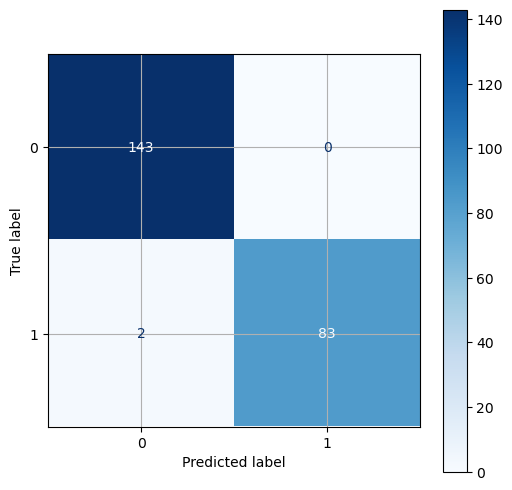

In [79]:
#confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, pred_knn2, labels=gridKNN.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gridKNN.classes_)
fig = plt.figure(figsize=(5, 5))
disp.plot(cmap=plt.cm.Blues) 
plt.grid(which='major')     #remove cell gridlines
plt.gcf().set_size_inches(6, 6)   # Adjust the size of the plot
plt.show()

In [80]:
# Calculate the accuracy score for the KNN model with the best parameters
accuracy_knn2 = accuracy_score(Y_test, pred_knn2)
print("Accuracy score for KNN model with best parameters:", accuracy_knn2)

Accuracy score for KNN model with best parameters: 0.9912280701754386


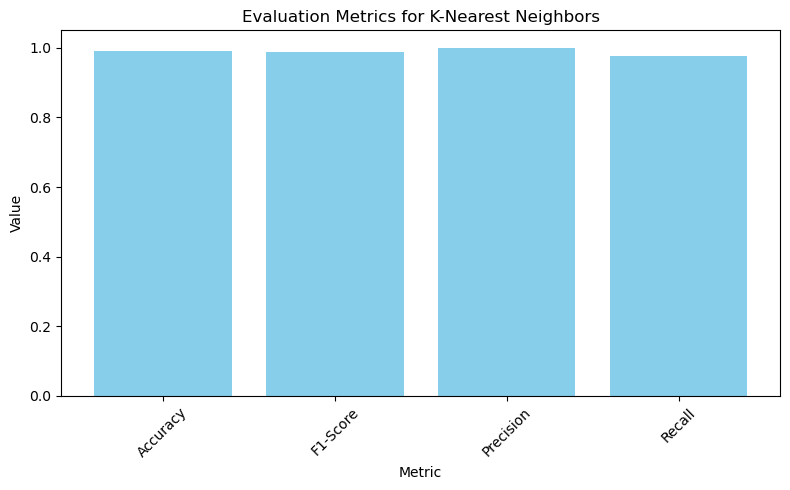

In [81]:
# Calculate and store the metrics
accuracy = accuracy_score(Y_test, pred_knn2)
f1 = f1_score(Y_test, pred_knn2)
precision = precision_score(Y_test, pred_knn2)
recall = recall_score(Y_test, pred_knn2)

# Create a DataFrame to store the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'F1-Score', 'Precision', 'Recall'],
    'Value': [accuracy, f1, precision, recall]
})

# Create a bar chart to visualize the metrics
plt.figure(figsize=(8, 5))
plt.bar(metrics_df['Metric'], metrics_df['Value'],color='skyblue')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Evaluation Metrics for K-Nearest Neighbors')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Gaussian Naive Bayes

In [82]:
GNB=GaussianNB()
GNB.fit(X_train, Y_train)

GaussianNB()

In [83]:
pred_GNB = GNB.predict(X_test)
pred_GNB

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1])

In [84]:
print(classification_report(Y_test, pred_GNB))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       143
           1       0.95      0.89      0.92        85

    accuracy                           0.94       228
   macro avg       0.94      0.93      0.94       228
weighted avg       0.94      0.94      0.94       228



In [85]:
# Calculate the accuracy score for the default Gaussian Naive Bayes model
accuracy_GNB = accuracy_score(Y_test, pred_GNB)
print("Accuracy score for default Gaussian Naive Bayes model:", accuracy_GNB)

Accuracy score for default Gaussian Naive Bayes model: 0.9429824561403509


# Turning for Gaussian Naive Bayes

In [86]:
from sklearn.model_selection import GridSearchCV
# defining parameter range
param_grid = {'var_smoothing': np.logspace(0, -9, num=100)}

gridGNB = GridSearchCV(GaussianNB(), param_grid, refit = True, verbose = 5)
  
# fitting the model for grid search
gridGNB.fit(X_train, Y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END .................var_smoothing=1.0;, score=0.912 total time=   0.0s
[CV 2/5] END .................var_smoothing=1.0;, score=0.940 total time=   0.0s
[CV 3/5] END .................var_smoothing=1.0;, score=0.912 total time=   0.0s
[CV 4/5] END .................var_smoothing=1.0;, score=0.962 total time=   0.0s
[CV 5/5] END .................var_smoothing=1.0;, score=0.890 total time=   0.0s
[CV 1/5] END ..var_smoothing=0.8111308307896871;, score=0.918 total time=   0.0s
[CV 2/5] END ..var_smoothing=0.8111308307896871;, score=0.951 total time=   0.0s
[CV 3/5] END ..var_smoothing=0.8111308307896871;, score=0.912 total time=   0.0s
[CV 4/5] END ..var_smoothing=0.8111308307896871;, score=0.967 total time=   0.0s
[CV 5/5] END ..var_smoothing=0.8111308307896871;, score=0.901 total time=   0.0s
[CV 1/5] END ...var_smoothing=0.657933224657568;, score=0.918 total time=   0.0s
[CV 2/5] END ...var_smoothing=0.65793322465756

[CV 4/5] END var_smoothing=0.008111308307896872;, score=0.956 total time=   0.0s
[CV 5/5] END var_smoothing=0.008111308307896872;, score=0.918 total time=   0.0s
[CV 1/5] END var_smoothing=0.006579332246575682;, score=0.923 total time=   0.0s
[CV 2/5] END var_smoothing=0.006579332246575682;, score=0.967 total time=   0.0s
[CV 3/5] END var_smoothing=0.006579332246575682;, score=0.918 total time=   0.0s
[CV 4/5] END var_smoothing=0.006579332246575682;, score=0.956 total time=   0.0s
[CV 5/5] END var_smoothing=0.006579332246575682;, score=0.918 total time=   0.0s
[CV 1/5] END var_smoothing=0.005336699231206307;, score=0.923 total time=   0.0s
[CV 2/5] END var_smoothing=0.005336699231206307;, score=0.967 total time=   0.0s
[CV 3/5] END var_smoothing=0.005336699231206307;, score=0.918 total time=   0.0s
[CV 4/5] END var_smoothing=0.005336699231206307;, score=0.956 total time=   0.0s
[CV 5/5] END var_smoothing=0.005336699231206307;, score=0.918 total time=   0.0s
[CV 1/5] END var_smoothing=0

[CV 1/5] END ...............var_smoothing=1e-05;, score=0.923 total time=   0.0s
[CV 2/5] END ...............var_smoothing=1e-05;, score=0.973 total time=   0.0s
[CV 3/5] END ...............var_smoothing=1e-05;, score=0.918 total time=   0.0s
[CV 4/5] END ...............var_smoothing=1e-05;, score=0.956 total time=   0.0s
[CV 5/5] END ...............var_smoothing=1e-05;, score=0.918 total time=   0.0s
[CV 1/5] END var_smoothing=8.111308307896873e-06;, score=0.923 total time=   0.0s
[CV 2/5] END var_smoothing=8.111308307896873e-06;, score=0.973 total time=   0.0s
[CV 3/5] END var_smoothing=8.111308307896873e-06;, score=0.918 total time=   0.0s
[CV 4/5] END var_smoothing=8.111308307896873e-06;, score=0.956 total time=   0.0s
[CV 5/5] END var_smoothing=8.111308307896873e-06;, score=0.918 total time=   0.0s
[CV 1/5] END var_smoothing=6.579332246575683e-06;, score=0.923 total time=   0.0s
[CV 2/5] END var_smoothing=6.579332246575683e-06;, score=0.973 total time=   0.0s
[CV 3/5] END var_smoo

[CV 5/5] END var_smoothing=8.111308307896856e-09;, score=0.918 total time=   0.0s
[CV 1/5] END var_smoothing=6.579332246575682e-09;, score=0.923 total time=   0.0s
[CV 2/5] END var_smoothing=6.579332246575682e-09;, score=0.973 total time=   0.0s
[CV 3/5] END var_smoothing=6.579332246575682e-09;, score=0.918 total time=   0.0s
[CV 4/5] END var_smoothing=6.579332246575682e-09;, score=0.956 total time=   0.0s
[CV 5/5] END var_smoothing=6.579332246575682e-09;, score=0.918 total time=   0.0s
[CV 1/5] END var_smoothing=5.336699231206302e-09;, score=0.923 total time=   0.0s
[CV 2/5] END var_smoothing=5.336699231206302e-09;, score=0.973 total time=   0.0s
[CV 3/5] END var_smoothing=5.336699231206302e-09;, score=0.918 total time=   0.0s
[CV 4/5] END var_smoothing=5.336699231206302e-09;, score=0.956 total time=   0.0s
[CV 5/5] END var_smoothing=5.336699231206302e-09;, score=0.918 total time=   0.0s
[CV 1/5] END var_smoothing=4.328761281083061e-09;, score=0.923 total time=   0.0s
[CV 2/5] END var

GridSearchCV(estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3101297...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             verbose=5)

In [87]:
print(gridGNB.best_params_)

{'var_smoothing': 0.0657933224657568}


In [88]:
#Let's run our SVC again with the best parameters.
GNB2 = GaussianNB(var_smoothing = 0.0657933224657568)
GNB2.fit(X_train, Y_train)
pred_GNB2 = GNB2.predict(X_test)
print(classification_report(Y_test, pred_GNB2))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       143
           1       0.95      0.87      0.91        85

    accuracy                           0.93       228
   macro avg       0.94      0.92      0.93       228
weighted avg       0.93      0.93      0.93       228



In [89]:
# Calculate the accuracy score for the Gaussian Naive Bayes model with the best parameters
accuracy_GNB2 = accuracy_score(Y_test, pred_GNB2)
print("Accuracy score for Gaussian Naive Bayes model with best parameters:", accuracy_GNB2)

Accuracy score for Gaussian Naive Bayes model with best parameters: 0.9342105263157895


<Figure size 500x500 with 0 Axes>

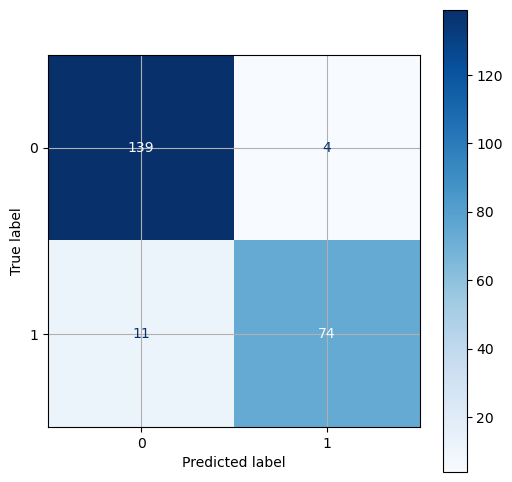

In [90]:
#confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, pred_GNB2, labels=gridGNB.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gridGNB.classes_)
fig = plt.figure(figsize=(5, 5))
disp.plot(cmap=plt.cm.Blues) 
plt.grid(which='major')     #remove cell gridlines
plt.gcf().set_size_inches(6, 6)   # Adjust the size of the plot
plt.show()

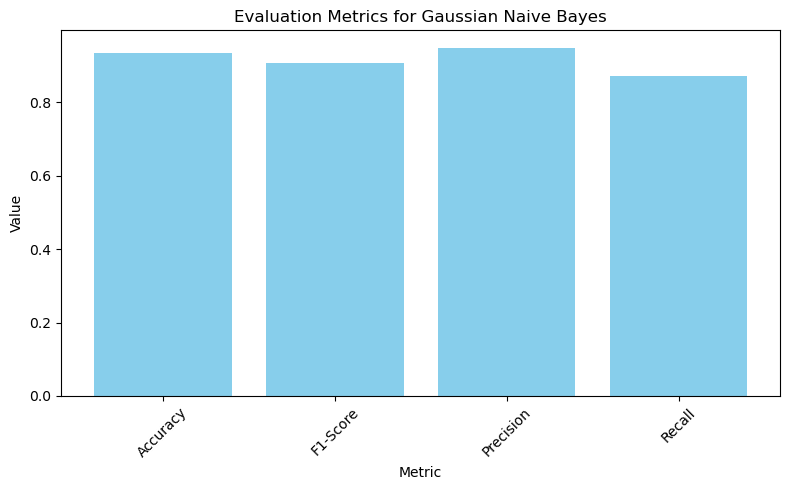

In [91]:
# Calculate and store the metrics
accuracy = accuracy_score(Y_test, pred_GNB2)
f1 = f1_score(Y_test, pred_GNB2)
precision = precision_score(Y_test, pred_GNB2)
recall = recall_score(Y_test, pred_GNB2)

# Create a DataFrame to store the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'F1-Score', 'Precision', 'Recall'],
    'Value': [accuracy, f1, precision, recall]
})

# Create a bar chart to visualize the metrics
plt.figure(figsize=(8, 5))
plt.bar(metrics_df['Metric'], metrics_df['Value'],color='skyblue')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Evaluation Metrics for Gaussian Naive Bayes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Cross-validation using scikit

In [92]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True)

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    GNB2 = GaussianNB(var_smoothing = 1.2328467394420635e-09)
    GNB2.fit(X_train, Y_train)
    predictions = GNB2.predict(X_test)
    print(classification_report(predictions, Y_test))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       131
           1       0.89      0.96      0.92        97

    accuracy                           0.93       228
   macro avg       0.93      0.93      0.93       228
weighted avg       0.93      0.93      0.93       228

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       156
           1       0.91      0.89      0.90        72

    accuracy                           0.94       228
   macro avg       0.93      0.93      0.93       228
weighted avg       0.94      0.94      0.94       228

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       149
           1       0.87      0.95      0.91        79

    accuracy                           0.93       228
   macro avg       0.92      0.94      0.93       228
weighted avg       0.94      0.93      0.93       228

              preci

In [93]:
# Calculate the accuracy score for the Gaussian Naive Bayes model with the best parameters
accuracy_GNB3 = accuracy_score(Y_test, predictions)
print("Accuracy score for Gaussian Naive Bayes model with best parameters:", accuracy_GNB3)

Accuracy score for Gaussian Naive Bayes model with best parameters: 0.960352422907489


# Comparison Table

In [94]:
print("       Model              :          Accuracy          :    After Tuning     ")
print("-----------------------------------------------------------------------------")
print("Support Vector Machine    :  ",accuracy_svc,"      :     ",accuracy_svc2  )
print("Logistic regresssion      :  ",accuracy_log,"      :     ",accuracy_log2  )
print("k-nearest neighbours      :  ",accuracy_knn,"      :     ",accuracy_knn2  )
print("Gaussian Naive Bayes      :  ",accuracy_GNB,"      :     ",accuracy_GNB3  )



       Model              :          Accuracy          :    After Tuning     
-----------------------------------------------------------------------------
Support Vector Machine    :   0.9824561403508771       :      0.9868421052631579
Logistic regresssion      :   0.9780701754385965       :      0.9780701754385965
k-nearest neighbours      :   0.9692982456140351       :      0.9912280701754386
Gaussian Naive Bayes      :   0.9429824561403509       :      0.960352422907489


# Comparison graph- Before Tuning

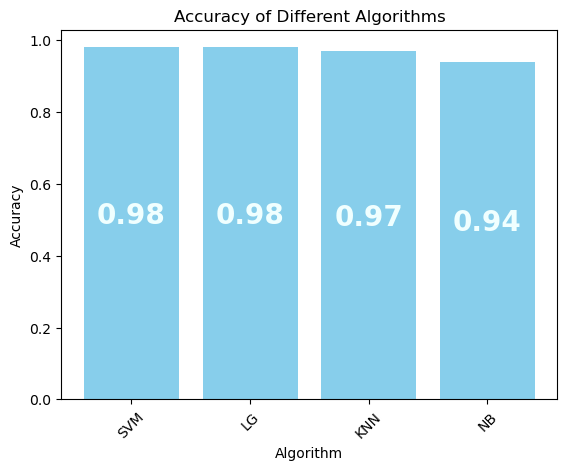

In [95]:
fig = plt.figure() 

labels = ["SVM", "LG","KNN","NB"]
accuracy_values = [accuracy_svc, accuracy_log, accuracy_knn,accuracy_GNB]
r_accuracy_values = [round(v, 2) for v in accuracy_values]
plt.bar(labels,r_accuracy_values,color='skyblue')

for i,v in enumerate(r_accuracy_values):
    plt.text(i, v/2, str(v), ha='center', color='azure', fontsize=20,fontweight='bold')

plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.title("Accuracy of Different Algorithms")
plt.xticks(rotation=45)
plt.show()

# Comparison graph- Before Tuning vs After Tuning 

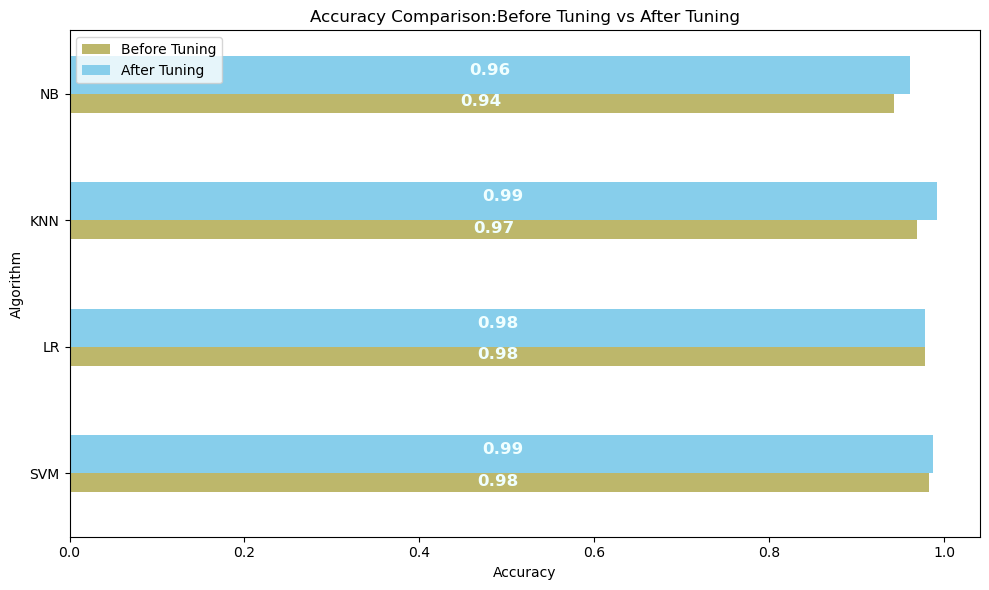

In [101]:
import matplotlib.pyplot as plt

# Create lists of labels and accuracy values
labels = ["SVM", "LR", "KNN", "NB"]
accuracy_values = [accuracy_svc, accuracy_log, accuracy_knn,accuracy_GNB]
accuracy_values2 = [accuracy_svc2, accuracy_log2, accuracy_knn2,accuracy_GNB3]

# Define colors for the bars
colors = [ 'darkkhaki','skyblue']

# Create a horizontal bar chart with different widths for the bars
bar_width = 0.3
x = range(len(labels))  # Set the x-axis positions for the bars

plt.figure(figsize=(10, 6))  # Adjust the figure size for better visibility
# Round accuracy values 
r_accuracy_values = [round(v,2) for v in accuracy_values] 
r_accuracy_values2 = [round(v,2) for v in accuracy_values2]

# Annotate text for first set of bars
for i, v in enumerate(r_accuracy_values):
    #x_val = v + 0.01
    x_val = v/2
    y_val = x[i]-0.1
    plt.text(x_val, y_val, str(v), ha='center',color='azure', fontsize=12,fontweight='bold') 
shifted_x = [p + bar_width / 2 for p in x]

# Annotate text for second set of bars  
for i, v in enumerate(r_accuracy_values2):
    x_val = v/2
    y_val = shifted_x[i]
    plt.text(x_val, y_val, str(v), ha='center', color='azure',fontsize=12, fontweight='bold')

# Plot the first set of accuracy values with a bar width of 0.3
plt.barh(x, accuracy_values, bar_width, label='Before Tuning', color=colors[0])


# Shift the x-axis positions slightly to avoid overlapping bars
shifted_x = [p + bar_width / 2 for p in x]

# Plot the second set of accuracy values with a shifted x-axis and a bar width of 0.3
plt.barh(shifted_x, accuracy_values2, bar_width, label='After Tuning', color=colors[1])

# Set limits for the y-axis to include all labels and bars
plt.ylim(-0.5, len(labels) - 0.5)

# Add labels and title
plt.xlabel("Accuracy")
plt.ylabel("Algorithm")
plt.title("Accuracy Comparison:Before Tuning vs After Tuning")


# Add label names to the y-axis
plt.yticks(x, labels)

# Add a legend to distinguish between the two datasets
plt.legend(loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


# Predictive system

In [103]:
scaler = StandardScaler()
input_data = (13.05,19.31,82.61,527.2,0.0806,0.03789,0.000692,0.004167,0.1819,0.05501,0.404,1.214,2.595,32.96,0.007491,0.008593,0.000692,0.004167,0.0219,0.00299,14.23,22.25,90.24,624.1,0.1021,0.06191,0.001845,0.01111,0.2439,0.06289)
#change the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
input_data_std = scaler.fit_transform(input_data_reshaped)

prediction = knn2.predict(input_data_std)
print(prediction)

if(prediction[0] == 0):
  print('The tumor is Benign')

else:
  print('The tumor is Malignant')

[0]
The tumor is Benign


# Deep Learning techniques:

In [104]:
import tensorflow as tf 
tf.random.set_seed(3)
from tensorflow import keras

# Convolutional Neural Networks (CNNs):

In [105]:
X =breast_cancer_data.drop(columns='target',axis=1)
Y = breast_cancer_data['target']

In [106]:
# Reshape the data into a 3D tensor for CNN input
X = np.array(X).reshape(X.shape[0], X.shape[1], 1)

In [107]:
# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [108]:
# Normalize the features
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

In [109]:
# Define the CNN model
model = keras.Sequential()
#model.add(BatchNormalization())
#model.add(BatchNormalization())
model.add(keras.layers.Conv1D(filters=32, kernel_size=3, activation="relu", input_shape=(X_train.shape[1], 1)))
model.add(keras.layers.MaxPooling1D(pool_size=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

In [110]:
# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [111]:
# Train the model
model.fit(X_train, Y_train, epochs=30, batch_size=32)

Epoch 1/30
25/25 [==============================] - 1s 5ms/step - loss: 0.6676 - accuracy: 0.6621
Epoch 2/30
25/25 [==============================] - 0s 5ms/step - loss: 0.5803 - accuracy: 0.7299
Epoch 3/30
25/25 [==============================] - 0s 4ms/step - loss: 0.4798 - accuracy: 0.8329
Epoch 4/30
25/25 [==============================] - 0s 5ms/step - loss: 0.3900 - accuracy: 0.8580
Epoch 5/30
25/25 [==============================] - 0s 5ms/step - loss: 0.3263 - accuracy: 0.8781
Epoch 6/30
25/25 [==============================] - 0s 4ms/step - loss: 0.2875 - accuracy: 0.8970
Epoch 7/30
25/25 [==============================] - 0s 4ms/step - loss: 0.2661 - accuracy: 0.8982
Epoch 8/30
25/25 [==============================] - 0s 4ms/step - loss: 0.2547 - accuracy: 0.8982
Epoch 9/30
25/25 [==============================] - 0s 5ms/step - loss: 0.2453 - accuracy: 0.9008
Epoch 10/30
25/25 [==============================] - 0s 5ms/step - loss: 0.2431 - accuracy: 0.9045
Epoch 11/30
25/25 [

# Recurrent Neural Networks (RNNs) Using LSTM Method

In [112]:
X =breast_cancer_data.drop(columns='target',axis=1)
Y = breast_cancer_data['target']

In [113]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

In [114]:
scaler = StandardScaler()


In [115]:
X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

In [116]:
# Define the RNN model
model = keras.Sequential()
#model.add(keras.layers.Embedding(input_dim=1000, output_dim=64))
model.add(keras.layers.LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(keras.layers.LSTM(units=32))
model.add(keras.layers.Dense(128, activation='relu'),)
model.add(keras.layers.Dense(1, activation="sigmoid"))

In [117]:
# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [118]:
# Train the model
history = model.fit(X_train_std, Y_train, validation_split=0.1, epochs=30)

Epoch 1/30
23/23 [==============================] - 8s 107ms/step - loss: 0.5301 - accuracy: 0.8729 - val_loss: 0.2780 - val_accuracy: 0.9000
Epoch 2/30
23/23 [==============================] - 1s 39ms/step - loss: 0.2873 - accuracy: 0.9134 - val_loss: 0.2196 - val_accuracy: 0.9375
Epoch 3/30
23/23 [==============================] - 1s 35ms/step - loss: 0.2672 - accuracy: 0.9204 - val_loss: 0.2278 - val_accuracy: 0.9375
Epoch 4/30
23/23 [==============================] - 1s 35ms/step - loss: 0.2590 - accuracy: 0.9218 - val_loss: 0.2053 - val_accuracy: 0.9375
Epoch 5/30
23/23 [==============================] - 1s 38ms/step - loss: 0.2335 - accuracy: 0.9288 - val_loss: 0.1769 - val_accuracy: 0.9375
Epoch 6/30
23/23 [==============================] - 1s 41ms/step - loss: 0.2174 - accuracy: 0.9274 - val_loss: 0.1569 - val_accuracy: 0.9375
Epoch 7/30
23/23 [==============================] - 1s 38ms/step - loss: 0.2215 - accuracy: 0.9344 - val_loss: 0.1541 - val_accuracy: 0.9375
Epoch 8/30
2

# Multilayer perceptron (MLP)Model

In [119]:
X =breast_cancer_data.drop(columns='target',axis=1)
Y = breast_cancer_data['target']

In [120]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [121]:
print(X.shape, X_train.shape, X_test.shape)

(1138, 30) (910, 30) (228, 30)


In [122]:
scaler = StandardScaler()

In [132]:

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)


In [124]:
print(X.shape, X_train.shape, X_test.shape)

(1138, 30) (910, 30) (228, 30)


In [125]:
# setting up the layers of Neural Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(30,)),
                          keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(2, activation='sigmoid')
                            
])

In [126]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [127]:
 # training the Meural Network

history = model.fit(X_train_std, Y_train, validation_split=0.1, epochs=30)

Epoch 1/30
26/26 [==============================] - 3s 15ms/step - loss: 0.4882 - accuracy: 0.7961 - val_loss: 0.3320 - val_accuracy: 0.8791
Epoch 2/30
26/26 [==============================] - 0s 5ms/step - loss: 0.2796 - accuracy: 0.9170 - val_loss: 0.2096 - val_accuracy: 0.9451
Epoch 3/30
26/26 [==============================] - 0s 6ms/step - loss: 0.1988 - accuracy: 0.9438 - val_loss: 0.1559 - val_accuracy: 0.9670
Epoch 4/30
26/26 [==============================] - 0s 5ms/step - loss: 0.1576 - accuracy: 0.9548 - val_loss: 0.1252 - val_accuracy: 0.9780
Epoch 5/30
26/26 [==============================] - 0s 5ms/step - loss: 0.1319 - accuracy: 0.9658 - val_loss: 0.1049 - val_accuracy: 0.9780
Epoch 6/30
26/26 [==============================] - 0s 4ms/step - loss: 0.1141 - accuracy: 0.9707 - val_loss: 0.0912 - val_accuracy: 0.9890
Epoch 7/30
26/26 [==============================] - 0s 5ms/step - loss: 0.1013 - accuracy: 0.9731 - val_loss: 0.0822 - val_accuracy: 0.9890
Epoch 8/30
26/26 [=

8/8 [==============================] - 0s 3ms/step
AUC: 0.5


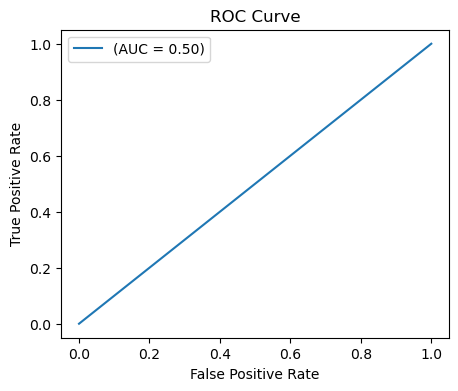


False Positive Rates: [0. 1.]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
True Positive Rates: [0. 1.]


In [134]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5, 4))
y_proba = model.predict(X_test)[:, 0]
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_proba)

# Calculate the AUC
auc = roc_auc_score(Y_test, y_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='(AUC = %0.2f)' % auc)

# Print the AUC
print('AUC:', auc)

# Show the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
print("")
print('False Positive Rates:', fpr)
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
print('True Positive Rates:', tpr)

# Comparison graph 

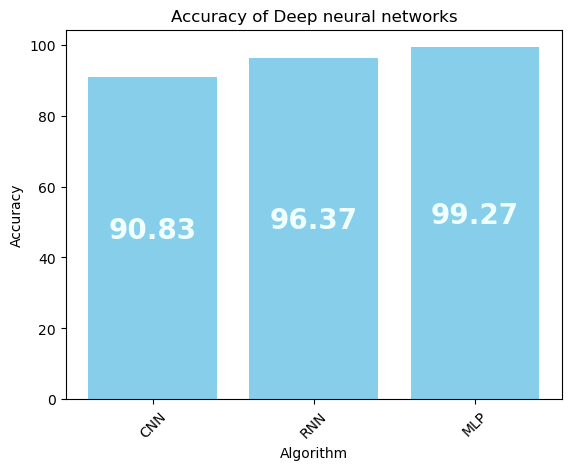

In [129]:
fig = plt.figure() 

labels = ["CNN", "RNN","MLP"]
accuracy_values = [90.83, 96.37, 99.27]
r_accuracy_values = [round(v, 2) for v in accuracy_values]
plt.bar(labels,r_accuracy_values,color='skyblue')

for i,v in enumerate(r_accuracy_values):
    plt.text(i, v/2, str(v), ha='center', color='azure', fontsize=20,fontweight='bold')

plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.title("Accuracy of Deep neural networks")
plt.xticks(rotation=45)
plt.show()

# Comparison Graph between ML and Deep learning

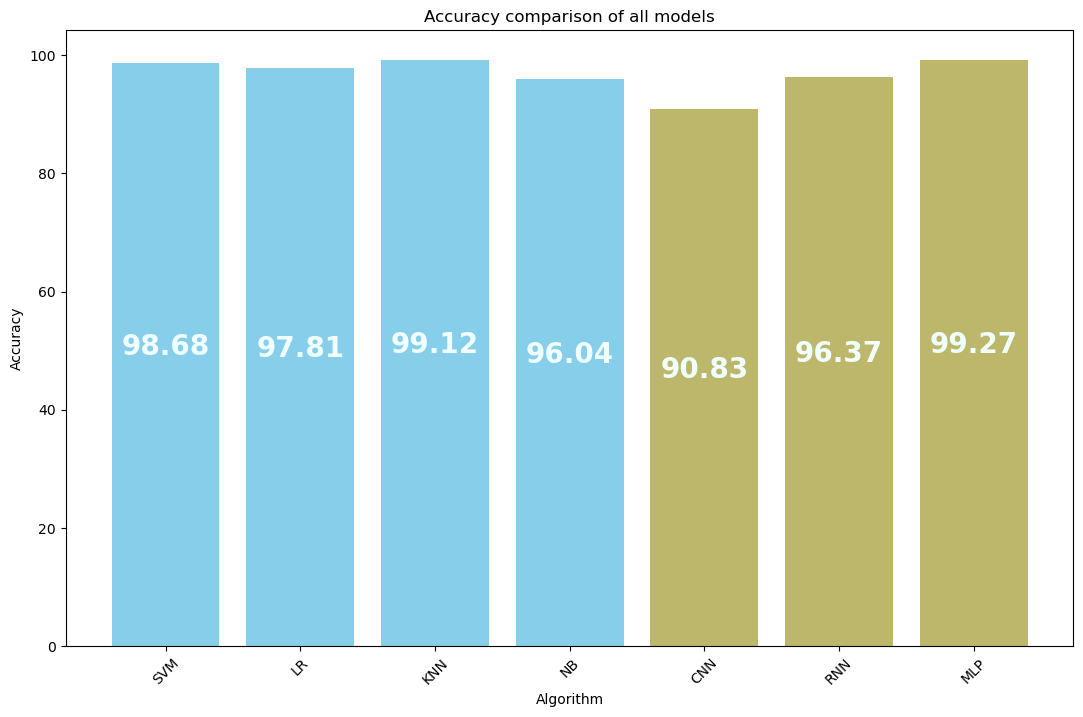

In [130]:

fig = plt.figure(figsize=(13,8))
labels = ["SVM", "LR", "KNN", "NB","CNN", "RNN","MLP"]
accuracy_values = [accuracy_svc2*100, accuracy_log2*100, accuracy_knn2*100,accuracy_GNB3*100,90.83, 96.37, 99.27]
r_accuracy_values = [round(v, 2) for v in accuracy_values]

# Define a list of colors for each bar
colors = ['skyblue'] * len(labels)
colors[-3:] = ['darkkhaki','darkkhaki','darkkhaki'] # Change the last 3 colors to red, green, and blue

# Plot the bars with the specified colors
plt.bar(labels, r_accuracy_values, color=colors)

# Annotate the bars with their accuracy values
for i, v in enumerate(r_accuracy_values):
    plt.text(i, v/2, str(v), ha='center', color='azure', fontsize=20, fontweight='bold')

plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.title("Accuracy comparison of all models")
plt.xticks(rotation=45)
plt.show()